# MIE1624 Final Project

## Ningcan Sun

### 1003270435

# <font color = 'Blue'>1. Data Cleaning – [1 mark]

You are provided with a link to a .csv file containing the COVID-19 (coronavirus) vaccinations dataset. In this section, you need to clean up the dataset by dealing with missing data and filling them with appropriate values (not necessarily zero) or dropping the unnecessary data. You may need to modify or create your own data cleaning pipeline, depending on the algorithm you use to model and predict vaccination rates. Please keep in mind that this is time series data, so the number of vaccinations on any given day should be the total number of vaccinations. (Hint: to fill in the missing values, examine the correlation matrix between the features, perform statistical tests to determine the similarity between their distributions, and finally decide whether to fill them with zeros or other appropriate values.)


In [1]:
#pip install scipy pandas pingouin
#!pip install pmdarima

### - <font color = 'Green'>My Data Cleaning Pipeline: </font>
### Step 1: Drop the 'total_vaccinations' NAN rows in original dataframe.
### Step 2: Create a new auxiliary dataframe, which drop the 'people_vaccinated' NAN rows.
### Step 3: Graph a heatmap based on auxiliary dataframe and calculate the correlation between each features.
### Step 4: Find the pairs of feature which correlation are higher than 0.95, do the shapiro-Wilk's, which is test the features whether are normal distribution.
### Step 5: -  If it is not normal distribution: do Mann-Whitney U test, check whether the two features have same distribution.  - If it is normal distribution, than, use t test or z test (depend on SD )
### Step 6: If they are not the same distribution, then we fill with 0, if they are the same distribution, then fill with the apporate value.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [3]:
covid = pd.read_csv('Complete_covid19_dataset.csv')

In [4]:
vaccination = pd.read_csv('Covid19-vaccination.csv')

In [5]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [7]:
# Check the number of the features and the observations
print('The COVID Dataset shape is',covid.shape)
print('The vaccination Dataset shape is',vaccination.shape)

The COVID Dataset shape is (134459, 67)
The vaccination Dataset shape is (63006, 16)


In [8]:
# Check the missing data
covid.isna().sum()

iso_code                                        0
continent                                    8578
location                                        0
date                                            0
total_cases                                  7393
                                            ...  
human_development_index                     18176
excess_mortality_cumulative_absolute       129736
excess_mortality_cumulative                129736
excess_mortality                           129736
excess_mortality_cumulative_per_million    129736
Length: 67, dtype: int64

In [9]:
# Check the missing data
vaccination.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

In [10]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### 1. Drop the 'total_vaccinations' NAN rows in Covid19-vaccination.csv

The reason to drop 'total_vacccinations' is because if total_vaccinations is NA, ther is no meaning in this rows.

In [11]:
vaccination = vaccination.drop(vaccination[vaccination.total_vaccinations.isna()].index)
vaccination.shape

(35729, 16)

### 2. Graph a heatmap to calculate the correlation

In [12]:
# Create a new dataframe
vaccination1 = vaccination.drop(vaccination[vaccination.people_vaccinated.isna()].index)
vaccination1.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


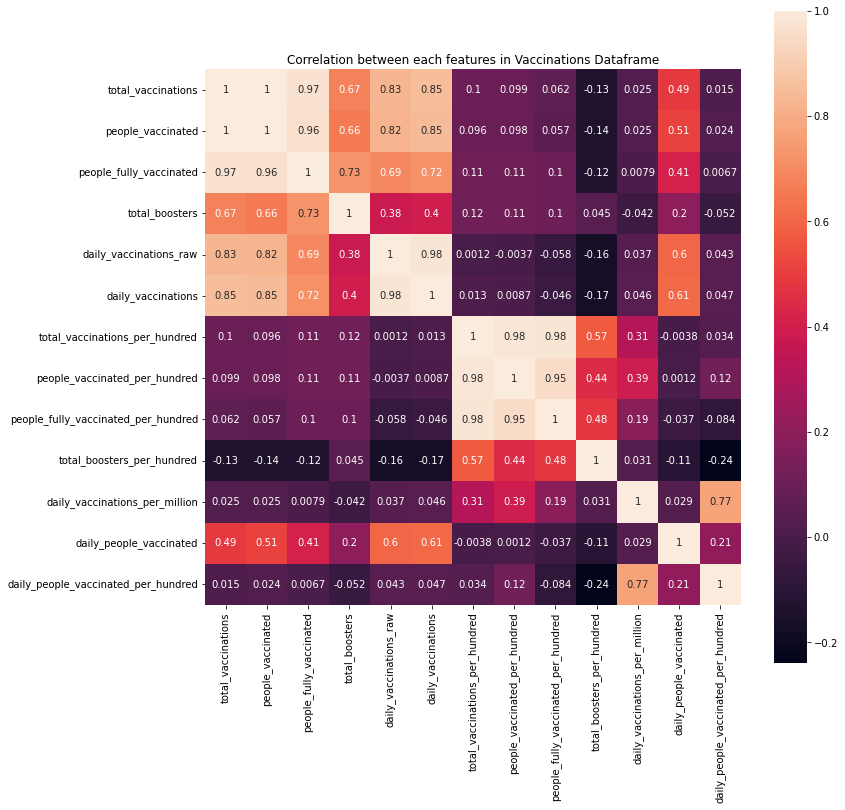

In [13]:
#correlation matrix

plt.subplots(figsize=(12, 12))
sns.heatmap(vaccination1.corr(), annot=True, square=True)
plt.title('Correlation between each features in Vaccinations Dataframe')
plt.show()



In [14]:
# The reason that the shape of the vaccinatio1 is different with vaccination because we drop the total_vacc's NA value
vaccination1.shape

(33850, 16)

In [15]:
# This is the orianginal dataset
vaccination.shape

(35729, 16)

### 3.Test the pairs of feature which correlation are higher than 0.95
### -  Find the pairs of feature which correlation are higher than 0.95, do the shapiro-Wilk's, test the features whether are normal distribution.
### - If it is not normal distribution: do Mann-Whitney U test, check whether the two features have same distribution. - If it is normal distribution, than, use t test or z test (depend on SD )


The <font color= 'Blue'>**<big>reason**</font> of I only test pairs of feature which correlation are higher than 0.95 because only these pairs may have the same distribution from each other. 


For the <font color= 'Blue'>**<big>rest pairs**</font>, we can directly fill them into 0.

    
#### - 1) <u>**First Pair**</u>: Test the distribution with 'people_fully_vaccinated' and 'total_vaccinations'
#### <font color = 'Orange'> - **The correlation between these two features are 0.97** </font>

In [16]:
vaccination2=vaccination1.drop(vaccination1[vaccination1.people_fully_vaccinated.isna()].index)
vaccination2.shape

(30638, 16)

In [17]:
vaccination2=vaccination2.drop(vaccination1[vaccination1.total_vaccinations.isna()].index)
vaccination2.shape

(30638, 16)

- <font color = 'Blue'> **What is the Null Hypothesis of Shapiro-Wiki** </font>

The **shapiro-Wilk's** <u>Null Hypothesis</u> is that the data is normal distribution.

In [18]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_fully_vaccinated'])
w, pvalue


/Users/ningcansun/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.18319576978683472, 0.0)

- <font color = 'Blue'> **What we can know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_fully_vaccinated' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [19]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.
w, pvalue = stats.shapiro(vaccination2['total_vaccinations'])
w, pvalue

(0.20982050895690918, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'total_vaccinations' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal distribution.

- <font color = 'Blue'> **What distribution I choose?** </font>

So we can see this is not a normal distribution, so we <u>**_CAN NOT_**</u> use the Z-test and T-test to test whether they have the same distribution. So, I decide to use the <u>**_Mann-Whitney test_**</u> to test whether they have the same distribution, this test has no requirement for the data variance and the distribution. 

- <font color = 'Blue'> **The Null Hypthesis of the Mann-Whitney test?**</font>

The <u>**_Null Hypothesis of the Mann-Whitney_**</u> test is two distributions are the same. The Althernative Hypothesis of the Mann-Whiteney is two groups have different distributions.

In [20]:
# use the Mann-Whitney U test to test whether they have the same distribution
stats.mannwhitneyu(x=vaccination2['people_fully_vaccinated'], y=vaccination2['total_vaccinations'], alternative = 'two-sided')


MannwhitneyuResult(statistic=358561916.5, pvalue=0.0)

Because the null hypothesis is the distribution of 'people_fully_vaccinated' is the same as the distribution of 'total_vaccinations'. But becasue the P-value is 0.00, so we can reject the null hypothesis, so we can conclude that the distribution of 'people_fully_vaccinated' is different from the distribution of 'total_vaccinations'.

- <font color = 'Blue'> **So we fill them into 0** </font>

#### - 2) <u>Second Pair</u>: Test  the distribution with 'people_fully_vaccinated' and 'people_vaccinated'

#### <font color = 'Orange'> - **The correlation between these two features are 0.96** </font>

In [21]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.
w, pvalue = stats.shapiro(vaccination2['people_fully_vaccinated'])
w, pvalue

(0.18319576978683472, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_fully_vaccinated' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [22]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_vaccinated'])
w, pvalue

(0.2145155668258667, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_vaccinated' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [23]:
# use the Mann-Whitney U test to test whether they have the same distribution
stats.mannwhitneyu(x=vaccination2['people_fully_vaccinated'], y=vaccination2['people_vaccinated'], alternative = 'two-sided')


MannwhitneyuResult(statistic=399279962.5, pvalue=1.0311410996240494e-224)

Because the null hypothesis is the distribution of 'people_fully_vaccinated' is the same as the distribution of 'people_vaccinated'. But becasue the P-value is almost 0.00 (9.860873987843475e-261), so we can reject the null hypothesis, so we can conclude that the distribution of these two features are different.

- <font color = 'Blue'> **So we fill them into 0** </font>

#### - 3) <u>Third Pair:</u> Test  the distribution with 'daily_vaccinations' and 'daily_vaccinations_raw'
#### <font color = 'Orange'> - **The correlation between these two features are 0.98** </font>

In [24]:
# Create a new dataframe and delete the column 'daily_vaccinations' NA rows
vaccination3=vaccination1.drop(vaccination1[vaccination1.daily_vaccinations.isna()].index)
vaccination3.shape

(33635, 16)

In [25]:
# Create a new dataframe and delete the column 'daily_vaccinations_raw' NA rows
vaccination3=vaccination1.drop(vaccination1[vaccination1.daily_vaccinations_raw.isna()].index)
vaccination3.shape

(28485, 16)

In [26]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination3['daily_vaccinations'])
w, pvalue

(0.25628572702407837, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'daily_vaccinations' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [27]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination3['daily_vaccinations_raw'])
w, pvalue

(0.25410544872283936, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'daily_vaccinations_raw' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [28]:
# use the Mann-Whitney U test to test whether they have the same distribution
stats.mannwhitneyu(x=vaccination3['daily_vaccinations'], y=vaccination3['daily_vaccinations_raw'], alternative = 'two-sided')


MannwhitneyuResult(statistic=416064125.5, pvalue=1.27935489762721e-07)

Because the null hypothesis is the distribution of 'people_fully_vaccinated' is the same as the distribution of 'people_vaccinated'. But becasue the P-value is almost 0.00 (4.197886860839454e-151), so we can reject the null hypothesis, so we can conclude that the distribution of these two features are different.

- <font color = 'Blue'> **So we fill them into 0** </font>

#### - 4) <u>Fourth Pair:</u> Test  the distribution with 'people_fully_vaccinated_per_hundred' and 'total_vaccinations_per_hundred'
#### <font color = 'Orange'> - **The correlation between these two features are 0.98** </font>

In [29]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['total_vaccinations_per_hundred'])
w, pvalue

(0.9077397584915161, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'total_vaccinations_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [30]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_fully_vaccinated_per_hundred'])
w, pvalue

(0.8678075075149536, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_fully_vaccinated_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal distribution. 

In [31]:
# use the Mann-Whitney U test to test whether they have the same distribution
stats.mannwhitneyu(x=vaccination2['people_fully_vaccinated_per_hundred'], y=vaccination2['total_vaccinations_per_hundred'], alternative = 'two-sided')


MannwhitneyuResult(statistic=281204991.5, pvalue=0.0)

Because the null hypothesis is the distribution of 'people_fully_vaccinated_per_hundred' is the same as the distribution of 'total_vaccinations_per_hundred'. But becasue the P-value is 0.00, so we can reject the null hypothesis, so we can conclude that the distribution of these two features are different.

- <font color = 'Blue'> **So we fill them into 0** </font>

#### - 5) <u>Fifth Pair:</u> Test  the distribution with 'people_fully_vaccinated_per_hundred' and 'people_vaccinated_per_hundred'
#### <font color = 'Orange'> - **The correlation between these two features are 0.95** </font>

In [32]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_fully_vaccinated_per_hundred'])
w, pvalue

(0.8678075075149536, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_fully_vaccinated_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [33]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_vaccinated_per_hundred'])
w, pvalue

(0.9220271110534668, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_vaccinated_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [34]:
# use the Mann-Whitney U test to test whether they have the same distribution
stats.mannwhitneyu(x=vaccination2['people_fully_vaccinated_per_hundred'], y=vaccination2['people_vaccinated_per_hundred'], alternative = 'two-sided')


MannwhitneyuResult(statistic=365155617.5, pvalue=0.0)

Because the null hypothesis is the distribution of 'people_fully_vaccinated_per_hundred' is the same as the distribution of 'people_vaccinated_per_hundred'. But becasue the P-value is 0.00, so we can reject the null hypothesis, so we can conclude that the distribution of these two features are different.

- <font color = 'Blue'> **So we fill them into 0** </font>

#### - 6) <u>Sixth Pair:</u> Test  the distribution with 'people_fully_vaccinated_per_hundred' and 'total_vaccinations_per_hundred'
#### <font color = 'Orange'> - **The correlation between these two features are 0.98** </font>

In [35]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_fully_vaccinated_per_hundred'])
w, pvalue

(0.8678075075149536, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_fully_vaccinated_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [36]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['total_vaccinations_per_hundred'])
w, pvalue

(0.9077397584915161, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'total_vaccinations_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [37]:
# use the Mann-Whitney U test to test whether they have the same distribution
stats.mannwhitneyu(x=vaccination2['people_fully_vaccinated_per_hundred'], y=vaccination2['total_vaccinations_per_hundred'], alternative = 'two-sided')


MannwhitneyuResult(statistic=281204991.5, pvalue=0.0)

Because the null hypothesis is the distribution of 'people_fully_vaccinated_per_hundred' is the same as the distribution of 'total_vaccinations_per_hundred'. But becasue the P-value is 0.00, so we can reject the null hypothesis, so we can conclude that the distribution of these two features are different.

- <font color = 'Blue'> **So we fill them into 0** </font>

#### - 7) <u>Seventh Pair:</u> Test  the distribution with 'people_vaccinated_per_hundred' and 'total_vaccinations_per_hundred'
#### <font color = 'Orange'> - **The correlation between these two features are 0.98** </font>

In [38]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['people_vaccinated_per_hundred'])
w, pvalue

(0.9220271110534668, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'people_vaccinated_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [39]:
#Shapiro-Wilk test to check whether it is normal distribution
# The shapiro-Wilk's Null Hypothesis is that the data is normal distribution.

w, pvalue = stats.shapiro(vaccination2['total_vaccinations_per_hundred'])
w, pvalue

(0.9077397584915161, 0.0)

- <font color = 'Blue'> **What can we know from the Shapiro-Wiki P-Value?** </font>

As the number shows, p value is 0.0 in the Shapiro-Wilk test, which we can conclude that the 'total_vaccinations_per_hundred' is significant (p < 0.05), we can reject the null hypothesis, so the data is not normal  distribution. 

In [40]:
# use the Mann-Whitney U test to test whether they have the same distribution
stats.mannwhitneyu(x=vaccination2['people_vaccinated_per_hundred'], y=vaccination2['total_vaccinations_per_hundred'], alternative = 'two-sided')


MannwhitneyuResult(statistic=354864621.5, pvalue=0.0)

Because the null hypothesis is the distribution of 'people_vaccinated_per_hundred' is the same as the distribution of 'total_vaccinations_per_hundred'. But becasue the P-value is 0.00, so we can reject the null hypothesis, so we can conclude that the distribution of these two features are different.

- <font color = 'Blue'> **So we fill them into 0** </font>

In conclusion, all of the P-value are 0, which means they don't have the same distribution with each other, so fill all number 0.

In [41]:
vaccination=vaccination.fillna(0)
vaccination.head(20)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,0.0,1367.0,0.02,0.02,0.00,0.0,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,0.0,2862.0,0.14,0.14,0.00,0.0,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,0.0,3000.0,0.30,0.30,0.00,0.0,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,0.0,8000.0,0.60,0.60,0.00,0.0,201.0,8000.0,0.020
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,0.0,13921.0,1.27,1.13,0.14,0.0,349.0,10994.0,0.028
87,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,0.0,0.0,4822.0,1.38,1.18,0.19,0.0,121.0,2385.0,0.006
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,0.0,0.0,5692.0,1.44,1.20,0.24,0.0,143.0,1883.0,0.005
93,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,0.0,0.0,6768.0,1.48,1.20,0.28,0.0,170.0,1631.0,0.004
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,0.0,2859.0,6487.0,1.49,1.20,0.29,0.0,163.0,1319.0,0.003


### 4. Clean data Complete_covid19_dataset.csv's feature I would like to use in Part 4

In [42]:
covid = covid.drop(covid[covid.total_vaccinations.isna()].index)
covid.shape

(34276, 67)

In [43]:
# Create a temporary df
covid1 = covid.drop(covid[covid.people_vaccinated.isna()].index)
covid1.shape

(32410, 67)

In [44]:
covid1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [45]:
new1=covid1.loc[:,'total_deaths':'new_deaths_smoothed_per_million']
new1

,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
364,2433.0,1.0,0.857,1396.169,0.326,0.369,61.076,0.025,0.022
370,2443.0,0.0,1.571,1398.604,0.176,0.394,61.327,0.000,0.039
386,2460.0,1.0,1.286,1405.658,0.251,0.427,61.754,0.025,0.032
408,2512.0,0.0,4.000,1427.699,2.360,1.503,63.059,0.000,0.100
423,2561.0,4.0,4.000,1463.823,2.460,2.790,64.290,0.100,0.100
...,...,...,...,...,...,...,...,...,...
134453,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104
134454,4697.0,1.0,1.000,8841.538,0.663,2.205,311.221,0.066,0.066
134455,4698.0,1.0,1.000,8845.977,4.439,2.489,311.287,0.066,0.066
134457,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.000,0.047


In [46]:
new2=covid1.loc[:,'total_vaccinations':'new_people_vaccinated_smoothed']
new2

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed
364,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
370,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0
386,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0
408,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0
423,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134453,6165714.0,3469198.0,2696516.0,NaN,10344.0,20608.0,40.85,22.99,17.87,NaN,1365.0,13782.0
134454,6190303.0,3484207.0,2706096.0,NaN,24589.0,22283.0,41.02,23.09,17.93,NaN,1476.0,14852.0
134455,6228119.0,3515140.0,2712979.0,NaN,37816.0,24487.0,41.27,23.29,17.98,NaN,1622.0,17188.0
134457,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0


In [47]:
new3=covid1.loc[:,'location']
new3

364       Afghanistan
370       Afghanistan
386       Afghanistan
408       Afghanistan
423       Afghanistan
             ...     
134453       Zimbabwe
134454       Zimbabwe
134455       Zimbabwe
134457       Zimbabwe
134458       Zimbabwe
Name: location, Length: 32410, dtype: object

In [48]:
new_df_part4=pd.concat([new1,new2,new3], axis=1)
new_df_part4

,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_vaccinations,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,location
364,2433.0,1.0,0.857,1396.169,0.326,0.369,61.076,0.025,0.022,0.0,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,Afghanistan
370,2443.0,0.0,1.571,1398.604,0.176,0.394,61.327,0.000,0.039,8200.0,...,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,Afghanistan
386,2460.0,1.0,1.286,1405.658,0.251,0.427,61.754,0.025,0.032,54000.0,...,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,Afghanistan
408,2512.0,0.0,4.000,1427.699,2.360,1.503,63.059,0.000,0.100,120000.0,...,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,Afghanistan
423,2561.0,4.0,4.000,1463.823,2.460,2.790,64.290,0.100,0.100,240000.0,...,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134453,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104,6165714.0,...,NaN,10344.0,20608.0,40.85,22.99,17.87,NaN,1365.0,13782.0,Zimbabwe
134454,4697.0,1.0,1.000,8841.538,0.663,2.205,311.221,0.066,0.066,6190303.0,...,NaN,24589.0,22283.0,41.02,23.09,17.93,NaN,1476.0,14852.0,Zimbabwe
134455,4698.0,1.0,1.000,8845.977,4.439,2.489,311.287,0.066,0.066,6228119.0,...,NaN,37816.0,24487.0,41.27,23.29,17.98,NaN,1622.0,17188.0,Zimbabwe
134457,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.000,0.047,6310431.0,...,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,Zimbabwe


# <font color = 'Blue'>2. Data Visualization and Exploratory Data Analysis - [4 marks]

#### - 1. Which country's people get the most vaccinations

In [49]:
#Showing Country name without duplicates.
vaccination['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [50]:
# How many countries we have in this datasets
vaccination['location'].nunique()

235

In [51]:
# Group data by 'people_vaccinated', and sort them in location
Order_people_vaccinations = vaccination.groupby('location').people_vaccinated.max()
Order_people_vaccinations=Order_people_vaccinations.sort_values(ascending=False)
Order_people_vaccinations= pd.DataFrame(Order_people_vaccinations)
Order_people_vaccinations.head(20)

,people_vaccinated
location,
World,4.197512e+09
Asia,2.882381e+09
Upper middle income,1.883448e+09
Lower middle income,1.390193e+09
China,1.225000e+09
High income,8.904829e+08
India,7.669880e+08
Europe,4.622119e+08
North America,3.780404e+08


In [52]:
# There are too many name which are the general name for country, such as 'World','Lower Middle Income', 'Asia'
first_five_total_vacc=Order_people_vaccinations.iloc[[4,6,11,12,13,14,15,16,17,18],:]
first_five_total_vacc['location'] = first_five_total_vacc.index
first_five_total_vacc

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_4152/986531342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five_total_vacc['location'] = first_five_total_vacc.index


,people_vaccinated,location
location,,
China,1.225000e+09,China
India,7.669880e+08,India
United States,2.302987e+08,United States
Brazil,1.624368e+08,Brazil
Africa,1.392699e+08,Africa
Indonesia,1.344183e+08,Indonesia
Japan,9.954649e+07,Japan
Pakistan,7.884517e+07,Pakistan
Mexico,7.586211e+07,Mexico


/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_4152/399582359.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(['0','0.2 Billion','0.4 Billion','0.6 Billion','0.8 Billion','1 Billion','1.2 Billion'])


[Text(0, 0.0, '0'),
 Text(0, 200000000.0, '0.2 Billion'),
 Text(0, 400000000.0, '0.4 Billion'),
 Text(0, 600000000.0, '0.6 Billion'),
 Text(0, 800000000.0, '0.8 Billion'),
 Text(0, 1000000000.0, '1 Billion'),
 Text(0, 1200000000.0, '1.2 Billion'),
 Text(0, 1400000000.0, '')]

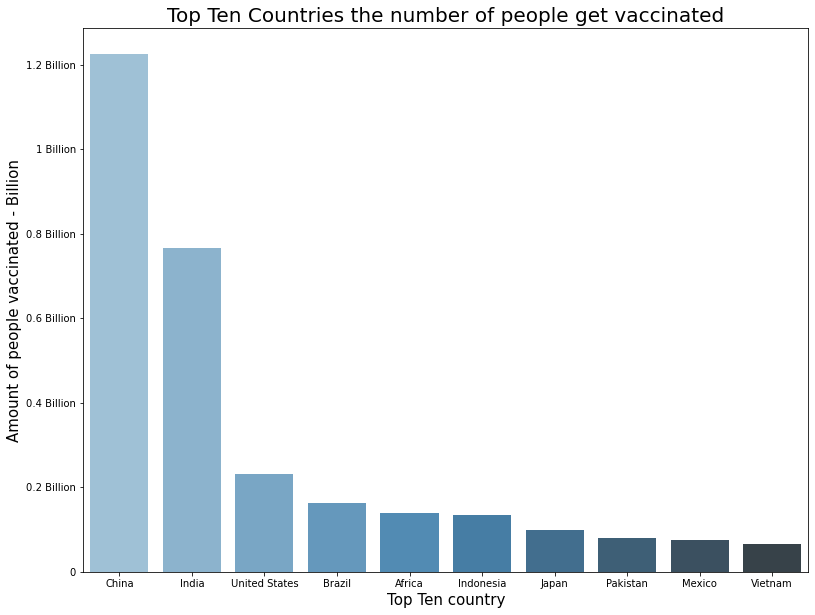

In [53]:
plt.figure(figsize=(13, 10))
a=sns.barplot(x=first_five_total_vacc['location'], y=first_five_total_vacc['people_vaccinated'], palette=("Blues_d"))

plt.xlabel('Top Ten country',fontsize=15)
plt.ylabel('Amount of people vaccinated - Billion',fontsize=15)
plt.title('Top Ten Countries the number of people get vaccinated',fontsize=20)
a.set_yticklabels(['0','0.2 Billion','0.4 Billion','0.6 Billion','0.8 Billion','1 Billion','1.2 Billion'])



#### - 2.  Which country has the high full vaccinated percentage? - Which country more safe consider about the fully vacciated?

In [54]:
# Group data by 'people_vaccinated', and sort them in location
Order_fully_vaccinations_hundred = vaccination.groupby('location').people_vaccinated_per_hundred.max()
Order_fully_vaccinations_hundred= Order_fully_vaccinations_hundred.sort_values(ascending=False)
Order_fully_vaccinations_hundred= pd.DataFrame(Order_fully_vaccinations_hundred)
Order_fully_vaccinations_hundred.head(20)

,people_vaccinated_per_hundred
location,
Gibraltar,121.37
Pitcairn,100.00
United Arab Emirates,98.10
Singapore,92.99
Brunei,90.56
Cuba,89.47
Portugal,89.04
Chile,87.38
Cayman Islands,86.25


Country Gibraltar has the 121.137% for people_fully_vaccinated, which is not make sense, so we should ignore this data.

In [55]:
Order_fully_vaccinations_hundred_top = Order_fully_vaccinations_hundred[1:6]
Order_fully_vaccinations_hundred_top

,people_vaccinated_per_hundred
location,
Pitcairn,100.00
United Arab Emirates,98.10
Singapore,92.99
Brunei,90.56
Cuba,89.47


/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_4152/3218295508.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(['0%','20%','40%','60%','80%','100%'])


[Text(0, 0.0, '0%'),
 Text(0, 20.0, '20%'),
 Text(0, 40.0, '40%'),
 Text(0, 60.0, '60%'),
 Text(0, 80.0, '80%'),
 Text(0, 100.0, '100%'),
 Text(0, 120.0, '')]

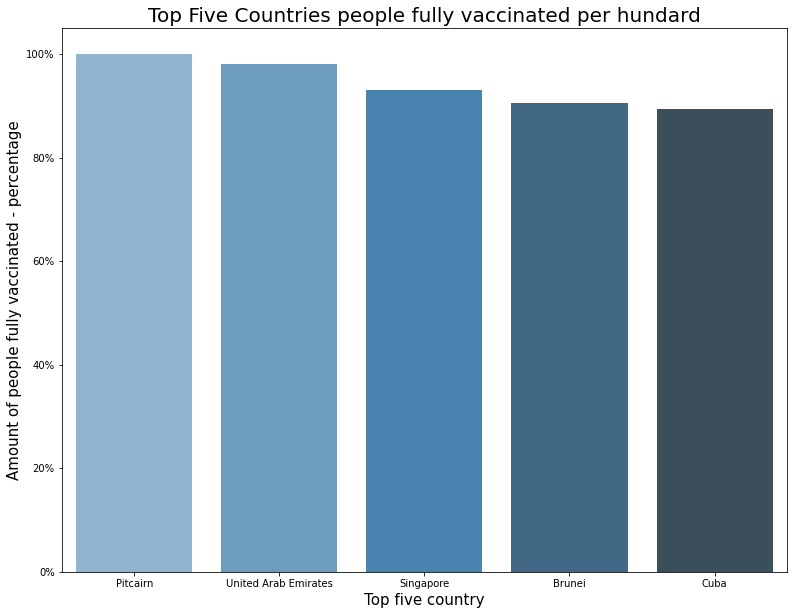

In [56]:
plt.figure(figsize=(13, 10))
b=sns.barplot(x=Order_fully_vaccinations_hundred_top.index, y=Order_fully_vaccinations_hundred_top['people_vaccinated_per_hundred'], palette=("Blues_d"))

plt.xlabel('Top five country',fontsize=15)
plt.ylabel('Amount of people fully vaccinated - percentage',fontsize=15)
plt.title('Top Five Countries people fully vaccinated per hundard',fontsize=20)
b.set_yticklabels(['0%','20%','40%','60%','80%','100%'])



#### 3. The percentage increase from day to day in the people_fully_vaccinated_per_hundred?

In [57]:
vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,0.0,1367.0,0.02,0.02,0.0,0.0,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,0.0,2862.0,0.14,0.14,0.0,0.0,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,0.0,3000.0,0.30,0.30,0.0,0.0,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,0.0,8000.0,0.60,0.60,0.0,0.0,201.0,8000.0,0.020


In [58]:
# Extract only three columns.
temp1=vaccination.loc[:,['location', 'date', 'people_fully_vaccinated_per_hundred']]
temp1

,location,date,people_fully_vaccinated_per_hundred
0,Afghanistan,2021-02-22,0.00
6,Afghanistan,2021-02-28,0.00
22,Afghanistan,2021-03-16,0.00
44,Afghanistan,2021-04-07,0.00
59,Afghanistan,2021-04-22,0.00
...,...,...,...
63000,Zimbabwe,2021-11-16,17.98
63002,Zimbabwe,2021-11-18,18.07
63003,Zimbabwe,2021-11-19,18.14
63004,Zimbabwe,2021-11-20,18.18


In [59]:
temp1_Pitcairn=temp1[temp1.location == 'Pitcairn']
temp1_United_Arab_Emirates=temp1[temp1.location == 'United Arab Emirates']
temp1_Singapore=temp1[temp1.location == 'Singapore']
temp1_Brunei=temp1[temp1.location == 'Brunei']
temp1_Cuba=temp1[temp1.location == 'Cuba']

In [60]:
temp1_United_Arab_Emirates.shape

(285, 3)

In [61]:
temp1_United_Arab_Emirates.head(200)

,location,date,people_fully_vaccinated_per_hundred
58898,United Arab Emirates,2021-01-05,0.00
58899,United Arab Emirates,2021-01-06,0.00
58900,United Arab Emirates,2021-01-07,0.00
58901,United Arab Emirates,2021-01-08,0.00
58902,United Arab Emirates,2021-01-09,0.00
...,...,...,...
59109,United Arab Emirates,2021-08-04,70.48
59110,United Arab Emirates,2021-08-05,70.78
59111,United Arab Emirates,2021-08-06,70.98
59112,United Arab Emirates,2021-08-07,71.27


In [62]:
# Temporary to delete the temp dataframe 0 value
temp1_United_Arab_Emirates=temp1_United_Arab_Emirates.drop(temp1_United_Arab_Emirates[temp1_United_Arab_Emirates.people_fully_vaccinated_per_hundred==0].index)
temp1_Singapore=temp1_Singapore.drop(temp1_Singapore[temp1_Singapore.people_fully_vaccinated_per_hundred==0].index)

Text(0.5, 1.0, 'Cuba')

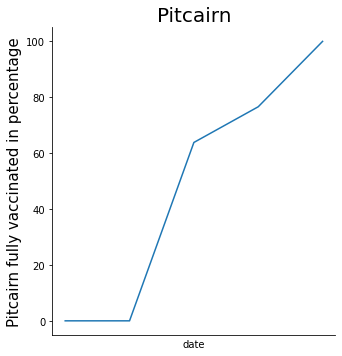

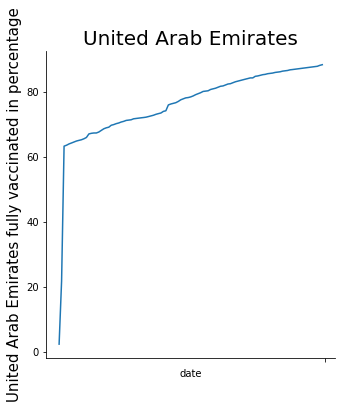

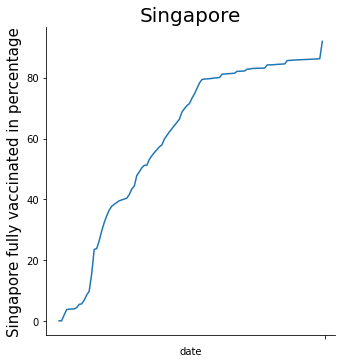

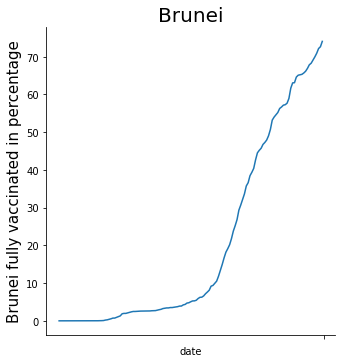

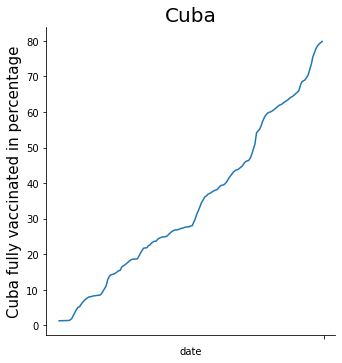

In [63]:
# Extract the countries in question 2 top countries graph.
p=sns.relplot(data=temp1_Pitcairn, x='date', y='people_fully_vaccinated_per_hundred', kind='line')
plt.xticks('')
plt.ylabel('Pitcairn fully vaccinated in percentage',fontsize=15)
plt.title('Pitcairn',fontsize=20)


u=sns.relplot(data=temp1_United_Arab_Emirates, x='date', y='people_fully_vaccinated_per_hundred', kind='line')
plt.xticks('')
plt.ylabel('United Arab Emirates fully vaccinated in percentage',fontsize=15)
plt.title('United Arab Emirates',fontsize=20)
#u.set_yticklabels(['0%','20%','40%','60%','80%'])

s=sns.relplot(data=temp1_Singapore, x='date', y='people_fully_vaccinated_per_hundred', kind='line')
plt.xticks('')
plt.ylabel('Singapore fully vaccinated in percentage',fontsize=15)
plt.title('Singapore',fontsize=20)
#s.set_yticklabels(['0%','20%','40%','60%','80%'])

b=sns.relplot(data=temp1_Brunei, x='date', y='people_fully_vaccinated_per_hundred', kind='line')
plt.xticks('')
plt.ylabel('Brunei fully vaccinated in percentage',fontsize=15)
plt.title('Brunei',fontsize=20)
#b.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%'])

c=sns.relplot(data=temp1_Cuba, x='date', y='people_fully_vaccinated_per_hundred', kind='line')
plt.xticks('')
plt.ylabel('Cuba fully vaccinated in percentage',fontsize=15)
plt.title('Cuba',fontsize=20)
#c.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%','70%','80%'])

#### 4. Which countries have higher daily vaccinated ?

In [64]:
# Group data by 'people_vaccinated', and sort them in location
Order_daily_vaccinations= vaccination.groupby('location').daily_vaccinations.max()
Order_daily_vaccinations= Order_daily_vaccinations.sort_values(ascending=False)
Order_daily_vaccinations= pd.DataFrame(Order_daily_vaccinations)
Order_daily_vaccinations.head(20)

,daily_vaccinations
location,
World,43233999.0
Asia,33335736.0
Upper middle income,27439252.0
China,22424286.0
Lower middle income,16674499.0
India,10037995.0
High income,8397153.0
Europe,5128678.0
North America,4173238.0


In [65]:
# There are too many name which are the general name for country, such as 'World','Lower Middle Income', 'Asia'
first_five_daily_vacc=Order_daily_vaccinations.iloc[[3,5,11,12,13,14,15,16,17,18],:]
first_five_daily_vacc['location'] = first_five_daily_vacc.index
first_five_daily_vacc

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_4152/2424294992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five_daily_vacc['location'] = first_five_daily_vacc.index


,daily_vaccinations,location
location,,
China,22424286.0,China
India,10037995.0,India
United States,3499189.0,United States
Brazil,2595170.0,Brazil
Africa,2030907.0,Africa
Japan,1997542.0,Japan
Indonesia,1901294.0,Indonesia
Mexico,1648223.0,Mexico
Vietnam,1632517.0,Vietnam


/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_4152/3920472139.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_yticklabels(['0 Million','5 Million','10 Million','15 Million','20 Million'])


[Text(0, 0.0, '0 Million'),
 Text(0, 5000000.0, '5 Million'),
 Text(0, 10000000.0, '10 Million'),
 Text(0, 15000000.0, '15 Million'),
 Text(0, 20000000.0, '20 Million'),
 Text(0, 25000000.0, '')]

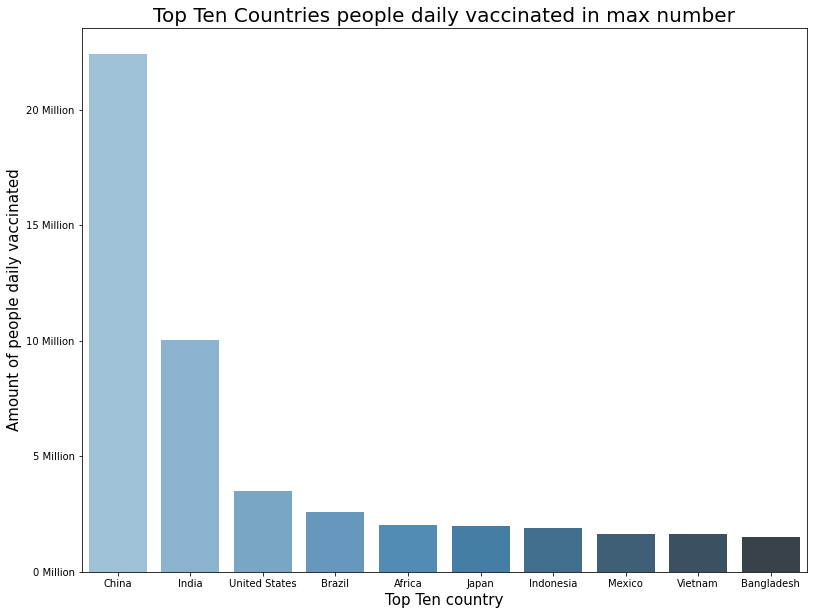

In [66]:
plt.figure(figsize=(13, 10))
c=sns.barplot(x=first_five_daily_vacc.index, y=first_five_daily_vacc['daily_vaccinations'], palette=("Blues_d"))

plt.xlabel('Top Ten country',fontsize=15)
plt.ylabel('Amount of people daily vaccinated',fontsize=15)
plt.title('Top Ten Countries people daily vaccinated in max number',fontsize=20)
c.set_yticklabels(['0 Million','5 Million','10 Million','15 Million','20 Million'])


<font color = 'Green'>**<big><big>Discussion: How might these trends be used to aid in the task of methodically extracting all relevant data and trends?** : 

- <font color = 'Blue'> **Discussion for graph 1 <u>(Top Ten Countries the number of people get vaccinated)</u> :** </font>As we can noticed that the china get the most vaccination until right now, which is 1.2 Billion, the second number of people get vaccination is India, which is almost 0.8 Billion. The third rank is the US. So according to this graph, we can noticed that the most of top 10 countries are densely populated country, especially China and India, Chinese has 1.4 billion people, so it is really normal that there is 1.2 billion chinese to have the vaccinated. So we can not only look at the number of the vaccinations, we also need to take a look at the percentage of the countries vaccinations. The higher number of people vaccinated does not mean everything, so we need to go into more deeper step in EDA.

- <font color = 'Blue'> **Discussion for graph 2 <u>(Top Five Countries people fully vaccinated per hundard)</u> :** </font>As we can noticed that the Pitcairn has 100% people fully vaccinated per hundard, which can shows us the Pitcairn country is safe, and the United Arab Emirates is also more safe. The next is the Singapore. I noticed the Pitcairn has the highly percentage may because the number of the peopulation is very less, which only have 67 people. 

- <font color = 'Blue'> **Discussion for graph 3 <u>(Top Five countries people fully vaccinated per hundard trend)</u>:** </font> These are the top 5 people fully vaccinated per hundred time series graph, we noticed that the Singapore people are very motivated at first, it increase very fast. Brunei country's people do not have many people to fully vaccinated, but after a period of time, it increase a lot.

- <font color = 'Blue'> **Discussion for graph 4 <u>(Top Ten Countries people max daily vaccinated)</u>:** </font> As we noticed that the daily vaccinated graph shows that China has a high speed to vaccinated people in a daily basis. The highest daily vaccinated for china is 22 Million, which is almost 2 times of India daily vaccinated number. It can shows that the developing country are really pay attention to the vaccinated. 



# <font color = 'Blue'>3. Model selection and fitting to data – [9 marks]

### - Country Canada ARIMA

In [67]:
#Create new columns based on distinct values and count them
vaccination_arima = vaccination.sort_values('location')
vaccination_arima['eid'] = (vaccination_arima.groupby(['location']).cumcount()==0).astype(int)
vaccination_arima['eid'] = vaccination_arima['eid'].cumsum()


In [68]:
#check the Canada's eid number
vaccination_arima[vaccination_arima.location=='Canada'].eid.unique()


array([38])

In [69]:
number_canada=vaccination_arima.loc[vaccination_arima['eid'] == 38]

#check dataframe of Canada
canada = number_canada.sort_values('people_vaccinated_per_hundred')
canada

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
9796,Canada,CAN,2020-12-15,727.0,727.0,0.0,0.0,722.0,722.0,0.00,0.00,0.00,0.00,19.0,722.0,0.002,38
9795,Canada,CAN,2020-12-14,5.0,5.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,38
9797,Canada,CAN,2020-12-16,3016.0,3016.0,0.0,0.0,2289.0,1506.0,0.01,0.01,0.00,0.00,40.0,1506.0,0.004,38
9798,Canada,CAN,2020-12-17,7267.0,7267.0,0.0,0.0,4251.0,2421.0,0.02,0.02,0.00,0.00,64.0,2421.0,0.006,38
9801,Canada,CAN,2020-12-20,12901.0,12901.0,0.0,0.0,859.0,2149.0,0.03,0.03,0.00,0.00,56.0,2149.0,0.006,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,Canada,CAN,2021-11-17,59776509.0,30102545.0,28764923.0,909041.0,76112.0,61164.0,157.03,79.08,75.56,2.39,1607.0,14376.0,0.038,38
10134,Canada,CAN,2021-11-18,59852559.0,30121803.0,28795770.0,934986.0,76050.0,66659.0,157.23,79.13,75.64,2.46,1751.0,15696.0,0.041,38
10135,Canada,CAN,2021-11-19,59918117.0,30136287.0,28821607.0,960223.0,65558.0,62649.0,157.40,79.16,75.71,2.52,1646.0,14717.0,0.039,38
10136,Canada,CAN,2021-11-20,59947684.0,30145291.0,28837538.0,964855.0,29567.0,62168.0,157.48,79.19,75.75,2.53,1633.0,14706.0,0.039,38


In [70]:
#Get the values from the column people_vaccinated_per_hundred.
value_canada = canada['people_vaccinated_per_hundred'].values

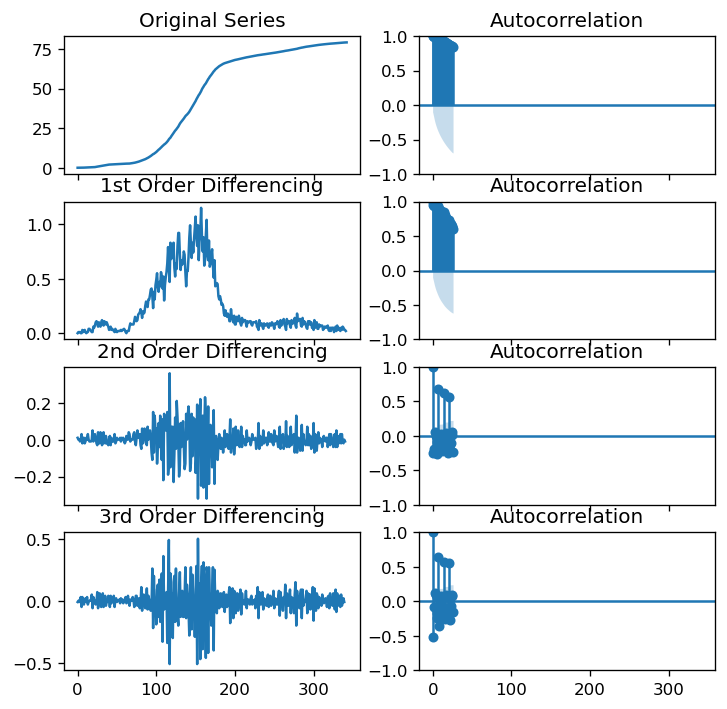

In [71]:
plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)

axes[0, 0].plot(value_canada); axes[0, 0].set_title('Original Series')
plot_acf(value_canada, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(value_canada)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(value_canada), ax=axes[1, 1])
diffval = np.diff(value_canada)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
diffval2 = np.diff(diffval)

# 3rd Differencing
axes[3, 0].plot(np.diff(diffval2)); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(diffval2), ax=axes[3, 1])
diffval3=np.diff(diffval2)
plt.show()

In [72]:
#stepwise_fit = pm.auto_arima(value_canada, trace=True, suppress_warning=True)

In [73]:
model = pm.auto_arima(value_canada, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=4, max_q=4, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
alpha= 0.001,                  
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-827.550, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-774.375, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-794.401, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-817.567, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-776.375, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-829.741, Time=0.34 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-818.651, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-827.765, Time=0.35 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-827.927, Time=0.25 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-829.936, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-831.341, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-829.977, Time=0.22 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-834.738, Time=0.48 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-850.413, Time=0.50 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept

#### The best model is ARIMA(4,2,4)

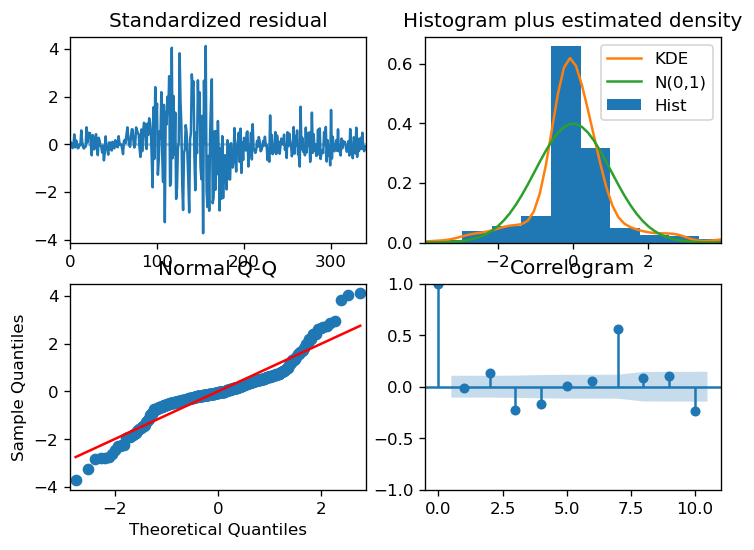

In [74]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

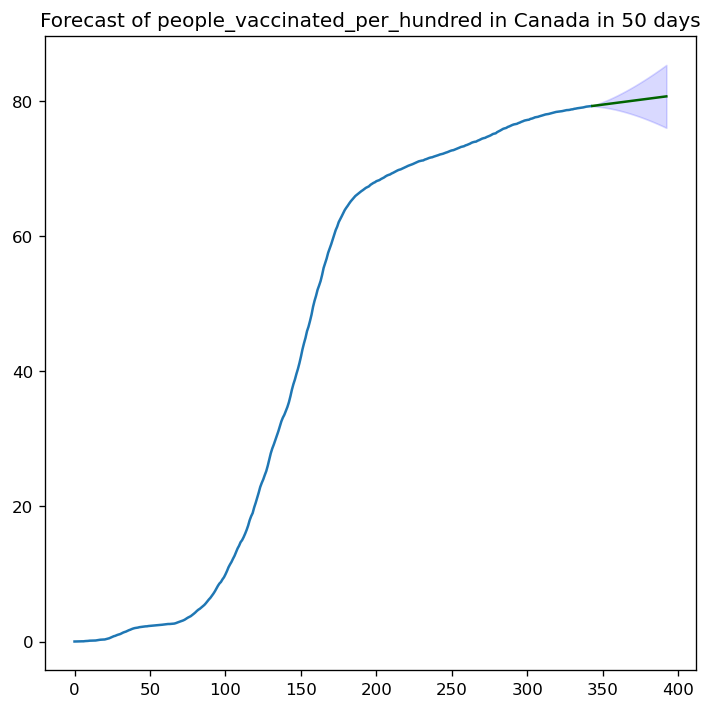

In [75]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.5)
index_of_fc = np.arange(len(value_canada), len(value_canada)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(value_canada)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of people_vaccinated_per_hundred in Canada in 50 days")
plt.show()

In [76]:
# get the final day's people_vaccinated_per_hundred
final_day_vacc_rate=value_canada[-1]/100
final_day_vacc_rate

0.7920999999999999

In [77]:
# Get the population of the Canada
canada_population=float(covid[covid.location =='Canada'].population.unique())
print ('The Population of Canada is',float(covid[covid.location =='Canada'].population.unique()))

# Get the population of the UK
UK_population=float(covid[covid.location =='United Kingdom'].population.unique())
print ('The Population of UK is',float(covid[covid.location =='United Kingdom'].population.unique()))

The Population of Canada is 38067913.0
The Population of UK is 68207114.0


In [78]:
fc_series

343    79.235412
344    79.263230
345    79.290548
346    79.318611
347    79.348217
348    79.377159
349    79.405205
350    79.434448
351    79.464126
352    79.492514
353    79.521031
354    79.550761
355    79.579855
356    79.608051
357    79.637233
358    79.666877
359    79.695369
360    79.723900
361    79.753527
362    79.782660
363    79.810937
364    79.840052
365    79.869643
366    79.898225
367    79.926767
368    79.956305
369    79.985463
370    80.013817
371    80.042874
372    80.072416
373    80.101074
374    80.129633
375    80.159089
376    80.188265
377    80.216691
378    80.245701
379    80.275193
380    80.303917
381    80.332497
382    80.361880
383    80.391067
384    80.419558
385    80.448531
386    80.477975
387    80.506756
388    80.535358
389    80.564677
390    80.593869
391    80.622420
392    80.651362
dtype: float64

In [79]:
# forecast the base case of the increase number of people vaccinated per hundard rate in 50 days
base_case=fc_series/100-final_day_vacc_rate
base_case_total=fc_series/100
base_case_increase_num=base_case* canada_population
base_case_num_total=base_case_total* canada_population
base_case_summary_df = pd.concat([base_case_increase_num,base_case_num_total],axis=1)
base_case_summary_df.columns=['Base Case of Number of vaccinated rate in 50 days (only in these 50 days)','Base Case of Total Vaccinated rate from begining to the next 50 days']
base_case_summary_df=base_case_summary_df.reset_index().iloc[:,1:]
base_case_summary_df

,Base Case of Number of vaccinated rate in 50 days (only in these 50 days),Base Case of Total Vaccinated rate from begining to the next 50 days
0,9673.887414,3.016327e+07
1,20263.700083,3.017386e+07
2,30663.041524,3.018426e+07
3,41346.078248,3.019494e+07
4,52616.195408,3.020621e+07
5,63634.093008,3.021723e+07
6,74310.638843,3.022790e+07
7,85442.756959,3.023904e+07
8,96740.505637,3.025033e+07
9,107547.290830,3.026114e+07


In [80]:
lower_series

343    79.192701
344    79.179422
345    79.164040
346    79.142119
347    79.119693
348    79.095895
349    79.068036
350    79.036620
351    79.004771
352    78.969894
353    78.931224
354    78.890972
355    78.849436
356    78.804230
357    78.756617
358    78.708098
359    78.657171
360    78.603062
361    78.547788
362    78.491153
363    78.431562
364    78.369920
365    78.307503
366    78.242905
367    78.175687
368    78.107408
369    78.037912
370    77.965822
371    77.891992
372    77.817402
373    77.740887
374    77.662064
375    77.582290
376    77.501378
377    77.418173
378    77.333402
379    77.247911
380    77.160673
381    77.071374
382    76.981177
383    76.889923
384    76.796600
385    76.701841
386    76.606383
387    76.509333
388    76.410403
389    76.310614
390    76.209833
391    76.107168
392    76.003161
dtype: float64

In [81]:
# forecast the worst case of the increase number of people vaccinated per hundard rate in 50 days
worst_case=lower_series/100-final_day_vacc_rate
worst_case_total=lower_series/100
worst_case_increase_num=worst_case*canada_population
worst_case_num_total=worst_case_total* canada_population
worst_case_summary_df = pd.concat([worst_case_increase_num,worst_case_num_total],axis=1)
worst_case_summary_df.columns=['Worst Case of Number of vaccinated rate in 50 days (only in these 50 days)','Worst Case of Total Vaccinated rate from begining to the next 50 days']
worst_case_summary_df=worst_case_summary_df.reset_index().iloc[:,1:]
worst_case_summary_df

,Worst Case of Number of vaccinated rate in 50 days (only in these 50 days),Worst Case of Total Vaccinated rate from begining to the next 50 days
0,-6.585471e+03,3.014701e+07
1,-1.164027e+04,3.014195e+07
2,-1.749596e+04,3.013610e+07
3,-2.584070e+04,3.012775e+07
4,-3.437784e+04,3.011922e+07
5,-4.343727e+04,3.011016e+07
6,-5.404281e+04,3.009955e+07
7,-6.600210e+04,3.008759e+07
8,-7.812630e+04,3.007547e+07
9,-9.140329e+04,3.006219e+07


In [82]:
upper_series

343    79.278124
344    79.347038
345    79.417056
346    79.495103
347    79.576740
348    79.658423
349    79.742375
350    79.832276
351    79.923481
352    80.015134
353    80.110839
354    80.210550
355    80.310274
356    80.411871
357    80.517849
358    80.625656
359    80.733567
360    80.844738
361    80.959266
362    81.074167
363    81.190312
364    81.310183
365    81.431784
366    81.553545
367    81.677848
368    81.805201
369    81.933013
370    82.061812
371    82.193757
372    82.327429
373    82.461261
374    82.597203
375    82.735888
376    82.875152
377    83.015208
378    83.158000
379    83.302475
380    83.447161
381    83.593619
382    83.742583
383    83.892210
384    84.042516
385    84.195220
386    84.349567
387    84.504178
388    84.660312
389    84.818740
390    84.977904
391    85.137672
392    85.299564
dtype: float64

In [83]:
# forecast the best case of the increase number of people vaccinated per hundard rate in 50 days
best_case=upper_series/100-final_day_vacc_rate
best_case_total=upper_series/100
best_case_increase_num=best_case*canada_population
best_case_num_total=best_case_total* canada_population
best_case_summary_df = pd.concat([best_case_increase_num,best_case_num_total],axis=1)
best_case_summary_df.columns=['Best Case of Number of vaccinated rate in 50 days (only in these 50 days)','Best Case of Total Vaccinated rate from begining to the next 50 days']
best_case_summary_df=best_case_summary_df.reset_index().iloc[:,1:]
best_case_summary_df


,Best Case of Number of vaccinated rate in 50 days (only in these 50 days),Best Case of Total Vaccinated rate from begining to the next 50 days
0,2.593325e+04,3.017953e+07
1,5.216767e+04,3.020576e+07
2,7.882204e+04,3.023242e+07
3,1.085329e+05,3.026213e+07
4,1.396102e+05,3.029320e+07
5,1.707055e+05,3.032430e+07
6,2.026641e+05,3.035626e+07
7,2.368876e+05,3.039048e+07
8,2.716073e+05,3.042520e+07
9,3.064979e+05,3.046009e+07


### <font color = 'Green'> - 1) Select a Model for country CANADA data

    
- I Select the ARIMA (Autoregressive integrated moving average) model, it is the statistics model to forcast the time series data. And the best ARIMA model is ARIMA(4,2,4) for this country's data
    

- ARIMA(4,2,4) shows that 4 is the number of autoregressive terms, 2 is the number of nonseasonal differences for stationarity, 4 is the number of lagged in the prediction equation. We choose this model becuase this model AIC is the lowest.
    
    
    
### <font color = 'Green'> - 2) Generate three projections for Canada    
    
#### <font color = 'Blue'> There are three preojections, one is worst-case scenario, base-case scenario and best-case scenario. 

- <font color = 'Brown'>Worst-Case Scenario</font>: which shows that we forecast that the number of people vaccinate in next 50 days is decrease in Canada, which is not make sense becasue the vaccination rate or the number of people get vaccinated can not be decrease, although we change the alpha, but the number still negative. So we should ignore this worst-case scenario and this predict result is **<u>NOT acceptable**</u>. The possible solution for this is assume that the worst case is no the vaccination rate does not change.

    
- <font color = 'Brown'>Base-Case Scenario</font>: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (9673 people get vaccinated) to the final day (548696 people get vaccinated in these 50 days. <u>**JUST IN THESE 50 DAYS**</u> ), in other words, the from now on to the next 50 days, there will 548696 people get vaccinated . This base-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 30702290. <u>**FOR THE WHOLE TIME PERIOD FROM VERY BEGINING TO THE NEXT 50 DAYS**</u>.

    
- <font color = 'Brown'>Best-Case Scenario</font>: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (25933 people get vaccinated) to the final day (2318170 people get vaccinated in these 50 days. <u>**JUST IN THESE 50 DAYS**</u>), in other words, the from now on to the next 50 days, there will 2318170 people get vaccinated . This best-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 32471760.<u>**FOR THE WHOLE TIME PERIOD FROM VERY BEGINING TO THE NEXT 50 DAYS**</u>.

### <font color = 'Green'> - 3) Discuss and interpret the findings 
    
- First I found that there already 79.2% people already get the vaccinated, and the predict base case people vaccinated rate around 80%, and the best case is people vaccinated rate around 85%, which is a really high percentage, so the people get COVID should decrease.

### - Country United Kindom ARIMA

In [84]:
#check the UK's eid number
vaccination_arima[vaccination_arima.location=='United Kingdom'].eid.unique()

array([222])

In [85]:
number_uk=vaccination_arima.loc[vaccination_arima['eid'] == 222]

#check dataframe of Canada
uk = number_uk.sort_values('people_vaccinated_per_hundred')
uk

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
59213,United Kingdom,GBR,2021-01-10,2677971.0,2286572.0,391399.0,0.0,0.0,0.0,3.93,3.35,0.57,0.00,0.0,0.0,0.000,222
59214,United Kingdom,GBR,2021-01-11,2843815.0,2431648.0,412167.0,0.0,165844.0,165844.0,4.17,3.57,0.60,0.00,2431.0,145076.0,0.213,222
59215,United Kingdom,GBR,2021-01-12,3067541.0,2639309.0,428232.0,0.0,223726.0,194785.0,4.50,3.87,0.63,0.00,2856.0,176368.0,0.259,222
59216,United Kingdom,GBR,2021-01-13,3356229.0,2918252.0,437977.0,0.0,288688.0,226086.0,4.92,4.28,0.64,0.00,3315.0,210560.0,0.309,222
59217,United Kingdom,GBR,2021-01-14,3678180.0,3234946.0,443234.0,0.0,321951.0,250052.0,5.39,4.74,0.65,0.00,3666.0,237094.0,0.348,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59523,United Kingdom,GBR,2021-11-16,110206709.0,50645981.0,46065838.0,13494890.0,398862.0,436561.0,161.58,74.25,67.54,19.79,6401.0,44264.0,0.065,222
59524,United Kingdom,GBR,2021-11-17,110646342.0,50679073.0,46087958.0,13879311.0,439633.0,399481.0,162.22,74.30,67.57,20.35,5857.0,31965.0,0.047,222
59525,United Kingdom,GBR,2021-11-18,111082929.0,50707953.0,46108608.0,14266368.0,436587.0,400442.0,162.86,74.34,67.60,20.92,5871.0,30893.0,0.045,222
59526,United Kingdom,GBR,2021-11-19,111478701.0,50734556.0,46129532.0,14614613.0,395772.0,397816.0,163.44,74.38,67.63,21.43,5832.0,29788.0,0.044,222


In [86]:
#Get the values from the column people_vaccinated_per_hundred.
value_uk = uk['people_vaccinated_per_hundred'].values

In [87]:
# get the final day's people_vaccinated_per_hundred
final_day_vacc_rate_uk=value_uk[-1]/100
final_day_vacc_rate_uk

0.7442

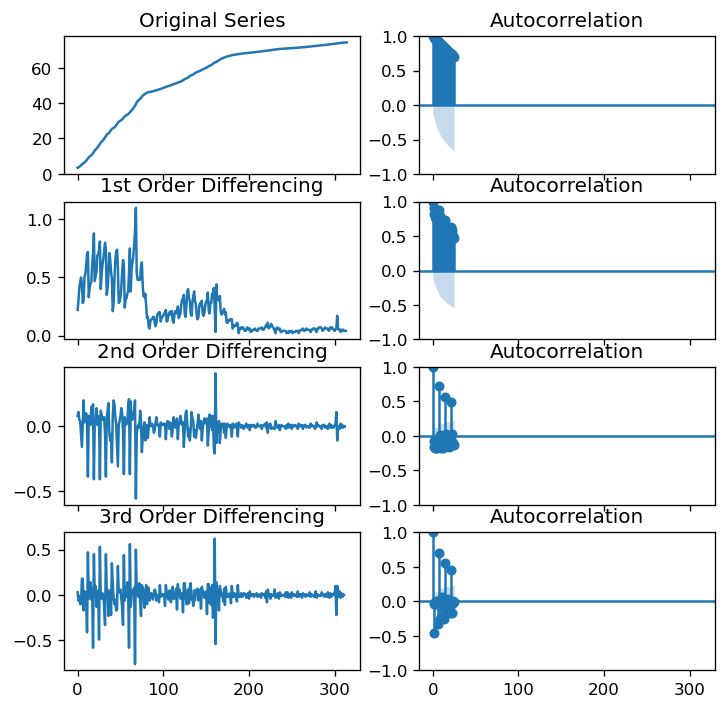

In [88]:
plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)

axes[0, 0].plot(value_uk); axes[0, 0].set_title('Original Series')
plot_acf(value_uk, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(value_uk)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(value_uk), ax=axes[1, 1])
diffval_uk = np.diff(value_uk)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval_uk)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval_uk), ax=axes[2, 1])
diffval_uk2 = np.diff(diffval_uk)

# 3rd Differencing
axes[3, 0].plot(np.diff(diffval_uk2)); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(diffval_uk2), ax=axes[3, 1])
plt.show()

In [89]:
model = pm.auto_arima(value_uk, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=4, max_q=4, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-624.767, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-589.801, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-589.279, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-590.188, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-591.789, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-630.427, Time=0.37 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-625.859, Time=0.11 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-637.697, Time=0.37 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-663.784, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-642.978, Time=0.34 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=-652.172, Time=0.41 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-698.211, Time=0.44 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-713.137, Time=0.40 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : 

#### The best model is ARIMA(3,2,4)

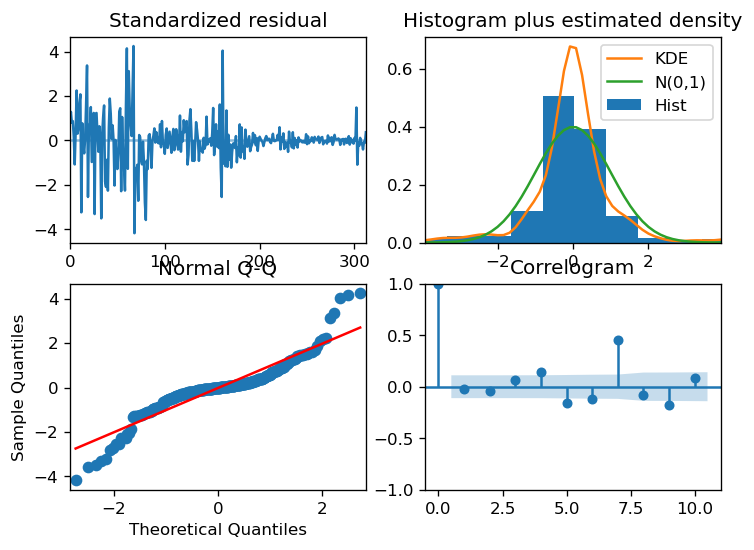

In [90]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

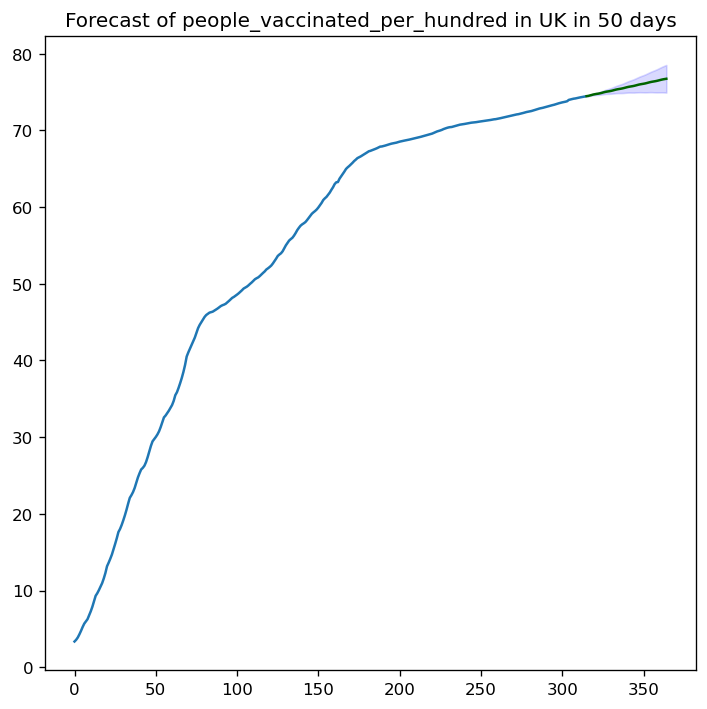

In [91]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.8)
index_of_fc = np.arange(len(value_uk), len(value_uk)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(value_uk)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of people_vaccinated_per_hundred in UK in 50 days")
plt.show()

In [92]:
covid.location=='United Kindom'

364       False
370       False
386       False
408       False
423       False
          ...  
134453    False
134454    False
134455    False
134457    False
134458    False
Name: location, Length: 34276, dtype: bool

In [93]:
fc_series

315    74.460672
316    74.493073
317    74.552610
318    74.607830
319    74.670000
320    74.711937
321    74.750071
322    74.779648
323    74.822560
324    74.873274
325    74.935003
326    74.990362
327    75.037435
328    75.071697
329    75.105784
330    75.145910
331    75.199064
332    75.257796
333    75.314474
334    75.359832
335    75.396014
336    75.429636
337    75.471135
338    75.523189
339    75.581969
340    75.637450
341    75.683266
342    75.719508
343    75.754183
344    75.795712
345    75.847793
346    75.905708
347    75.960829
348    76.006428
349    76.043287
350    76.078486
351    76.120439
352    76.172203
353    76.229583
354    76.284124
355    76.329728
356    76.366999
357    76.402843
358    76.445067
359    76.496633
360    76.553416
361    76.607486
362    76.653035
363    76.690753
364    76.727160
dtype: float64

In [94]:
# forecast the base case of the increase number of people vaccinated per hundard rate in 50 days
base_case=fc_series/100-final_day_vacc_rate_uk
base_case_total=fc_series/100
base_case_increase_num=base_case* UK_population
base_case_num_total=base_case_total* UK_population
base_case_summary_df = pd.concat([base_case_increase_num,base_case_num_total],axis=1)
base_case_summary_df.columns=['Base Case of Number of vaccinated rate in 50 days (only in these 50 days)','Base Case of Total Vaccinated rate from begining to the next 50 days']
base_case_summary_df=base_case_summary_df.reset_index().iloc[:,1:]
base_case_summary_df

,Base Case of Number of vaccinated rate in 50 days (only in these 50 days),Base Case of Total Vaccinated rate from begining to the next 50 days
0,2.774108e+04,5.078748e+07
1,4.984085e+04,5.080958e+07
2,9.044913e+04,5.085018e+07
3,1.281135e+05,5.088785e+07
4,1.705181e+05,5.093025e+07
5,1.991215e+05,5.095886e+07
6,2.251318e+05,5.098487e+07
7,2.453055e+05,5.100504e+07
8,2.745744e+05,5.103431e+07
9,3.091653e+05,5.106890e+07


In [95]:
lower_series

315    74.442216
316    74.457361
317    74.499516
318    74.535614
319    74.579446
320    74.602374
321    74.621016
322    74.628886
323    74.648122
324    74.673085
325    74.708351
326    74.736934
327    74.757290
328    74.764127
329    74.769550
330    74.779249
331    74.800583
332    74.826670
333    74.850557
334    74.863009
335    74.865821
336    74.864983
337    74.870651
338    74.885642
339    74.906692
340    74.924235
341    74.932021
342    74.929796
343    74.925093
344    74.926049
345    74.936506
346    74.952180
347    74.964863
348    74.967906
349    74.961816
350    74.953253
351    74.950396
352    74.956412
353    74.967487
354    74.975517
355    74.974483
356    74.964743
357    74.952846
358    74.946386
359    74.948423
360    74.955160
361    74.958978
362    74.954135
363    74.941109
364    74.926100
dtype: float64

In [96]:
# forecast the worst case of the increase number of people vaccinated per hundard rate in 50 days
worst_case=lower_series/100-final_day_vacc_rate_uk
worst_case_total=lower_series/100
worst_case_increase_num=worst_case*UK_population
worst_case_num_total=worst_case_total* UK_population
worst_case_summary_df = pd.concat([worst_case_increase_num,worst_case_num_total],axis=1)
worst_case_summary_df.columns=['Worst Case of Number of vaccinated rate in 50 days (only in these 50 days)','Worst Case of Total Vaccinated rate from begining to the next 50 days']
worst_case_summary_df=worst_case_summary_df.reset_index().iloc[:,1:]
worst_case_summary_df

,Worst Case of Number of vaccinated rate in 50 days (only in these 50 days),Worst Case of Total Vaccinated rate from begining to the next 50 days
0,15153.010650,5.077489e+07
1,25483.167000,5.078522e+07
2,54235.267470,5.081397e+07
3,78857.141444,5.083859e+07
4,108753.654886,5.086849e+07
5,124392.313761,5.088413e+07
6,137106.897206,5.089684e+07
7,142475.268091,5.090221e+07
8,155595.499257,5.091533e+07
9,172621.878739,5.093236e+07


In [97]:
upper_series

315    74.479127
316    74.528784
317    74.605703
318    74.680046
319    74.760555
320    74.821499
321    74.879126
322    74.930410
323    74.996997
324    75.073464
325    75.161655
326    75.243790
327    75.317581
328    75.379267
329    75.442017
330    75.512572
331    75.597544
332    75.688922
333    75.778391
334    75.856656
335    75.926206
336    75.994289
337    76.071620
338    76.160735
339    76.257247
340    76.350666
341    76.434511
342    76.509220
343    76.583272
344    76.665375
345    76.759080
346    76.859235
347    76.956795
348    77.044950
349    77.124758
350    77.203719
351    77.290482
352    77.387993
353    77.491679
354    77.592731
355    77.684974
356    77.769254
357    77.852840
358    77.943749
359    78.044843
360    78.151672
361    78.255993
362    78.351935
363    78.440397
364    78.528220
dtype: float64

In [98]:
# forecast the best case of the increase number of people vaccinated per hundard rate in 50 days
best_case=upper_series/100-final_day_vacc_rate_uk
best_case_total=upper_series/100
best_case_increase_num=best_case*UK_population
best_case_num_total=best_case_total* UK_population
best_case_summary_df = pd.concat([best_case_increase_num,best_case_num_total],axis=1)
best_case_summary_df.columns=['Best Case of Number of vaccinated rate in 50 days (only in these 50 days)','Best Case of Total Vaccinated rate from begining to the next 50 days']
best_case_summary_df=best_case_summary_df.reset_index().iloc[:,1:]
best_case_summary_df


,Best Case of Number of vaccinated rate in 50 days (only in these 50 days),Best Case of Total Vaccinated rate from begining to the next 50 days
0,4.032915e+04,5.080006e+07
1,7.419853e+04,5.083393e+07
2,1.266630e+05,5.088640e+07
3,1.773699e+05,5.093710e+07
4,2.322825e+05,5.099202e+07
5,2.738507e+05,5.103358e+07
6,3.131568e+05,5.107289e+07
7,3.481357e+05,5.110787e+07
8,3.935533e+05,5.115329e+07
9,4.457087e+05,5.120544e+07


### <font color = 'Green'> - 1) Select a Model for country UK data, interpret the model
    
- I Select the ARIMA (Autoregressive integrated moving average) model, it is the statistics model to forcast the time series data. And the best ARIMA model is ARIMA(3,2,4) for this country's data


- ARIMA(3,2,4) shows that 3 is the number of autoregressive terms, 2 is the number of nonseasonal differences for stationarity, 4 is the number of lagged in the prediction equation. We choose this model becuase this model AIC is the lowest.
    
    
### <font color = 'Green'> - 2) Generate three projections for UK    
    
#### <font color = 'Blue'> There are three preojections, one is worst-case scenario, base-case scenario and best-case scenario. 

- <font color = 'Brown'>Worst-Case Scenario</font>: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (15153 people get vaccinated) to the final day (345196 people get vaccinated in these 50 days. <u>**JUST IN THESE 50 DAYS**</u> ), in other words, the from now on to the next 50 days, there will 345196 people get vaccinated . This base-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 51104930 <u>**FOR THE WHOLE TIME PERIOD FROM VERY BEGINING TO THE NEXT 50 DAYS**</u>.

    
- <font color = 'Brown'>Base-Case Scenario</font>: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (27741 people get vaccinated) to the final day (1573647 people get vaccinated in these 50 days. <u>**JUST IN THESE 50 DAYS**</u> ), in other words, the from now on to the next 50 days, there will 1573647 people get vaccinated . This base-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 52333380 <u>**FOR THE WHOLE TIME PERIOD FROM VERY BEGINING TO THE NEXT 50 DAYS**</u>.

    
- <font color = 'Brown'>Best-Case Scenario</font>: which shows that we forecast that the number of people vaccinate (left-side column)in next 50 days is increase from the first day (40329 people get vaccinated) to the final day (2802098 people get vaccinated in these 50 days. <u>**JUST IN THESE 50 DAYS**</u>), in other words, the from now on to the next 50 days, there will 2802098 people get vaccinated . This best-case scenario dataframe (right-side column) shows that the predict total number of people get vaccinated from the very begining unitil the next 50 days is 53561830<u>**FOR THE WHOLE TIME PERIOD FROM VERY BEGINING TO THE NEXT 50 DAYS**</u>.

### <font color = 'Green'> - 3) Discuss and interpret the findings 
    
- First I found that there already 74.4% people already get the vaccinated in UK, and the predict base case people vaccinated rate around 76.7%, and the best case is people vaccinated rate around 78.5% and the worst case is people vaccinated rate around 74.9%, which is not a big increase, but in conclude, as the vaccinated rate increase, the UK people get COVID should decrease. But The COVID case may not decrease a lot becuase the slow vaccinated.   

# <font color = 'Blue'>4. Relating COVID-19 Vaccination to a Second Dataset – [5 marks]

#### 1) Factor I choose is <font color = 'Red'><u>new_deaths</u></font>, the cleaning step for the second dataset shows in part 1.

In [99]:
# Select only Canada data
canada_temp=new_df_part4[new_df_part4['location'].isin(['Canada'])]

# Select only UK data
uk_temp=new_df_part4[new_df_part4['location'].isin(['United Kingdom'])]


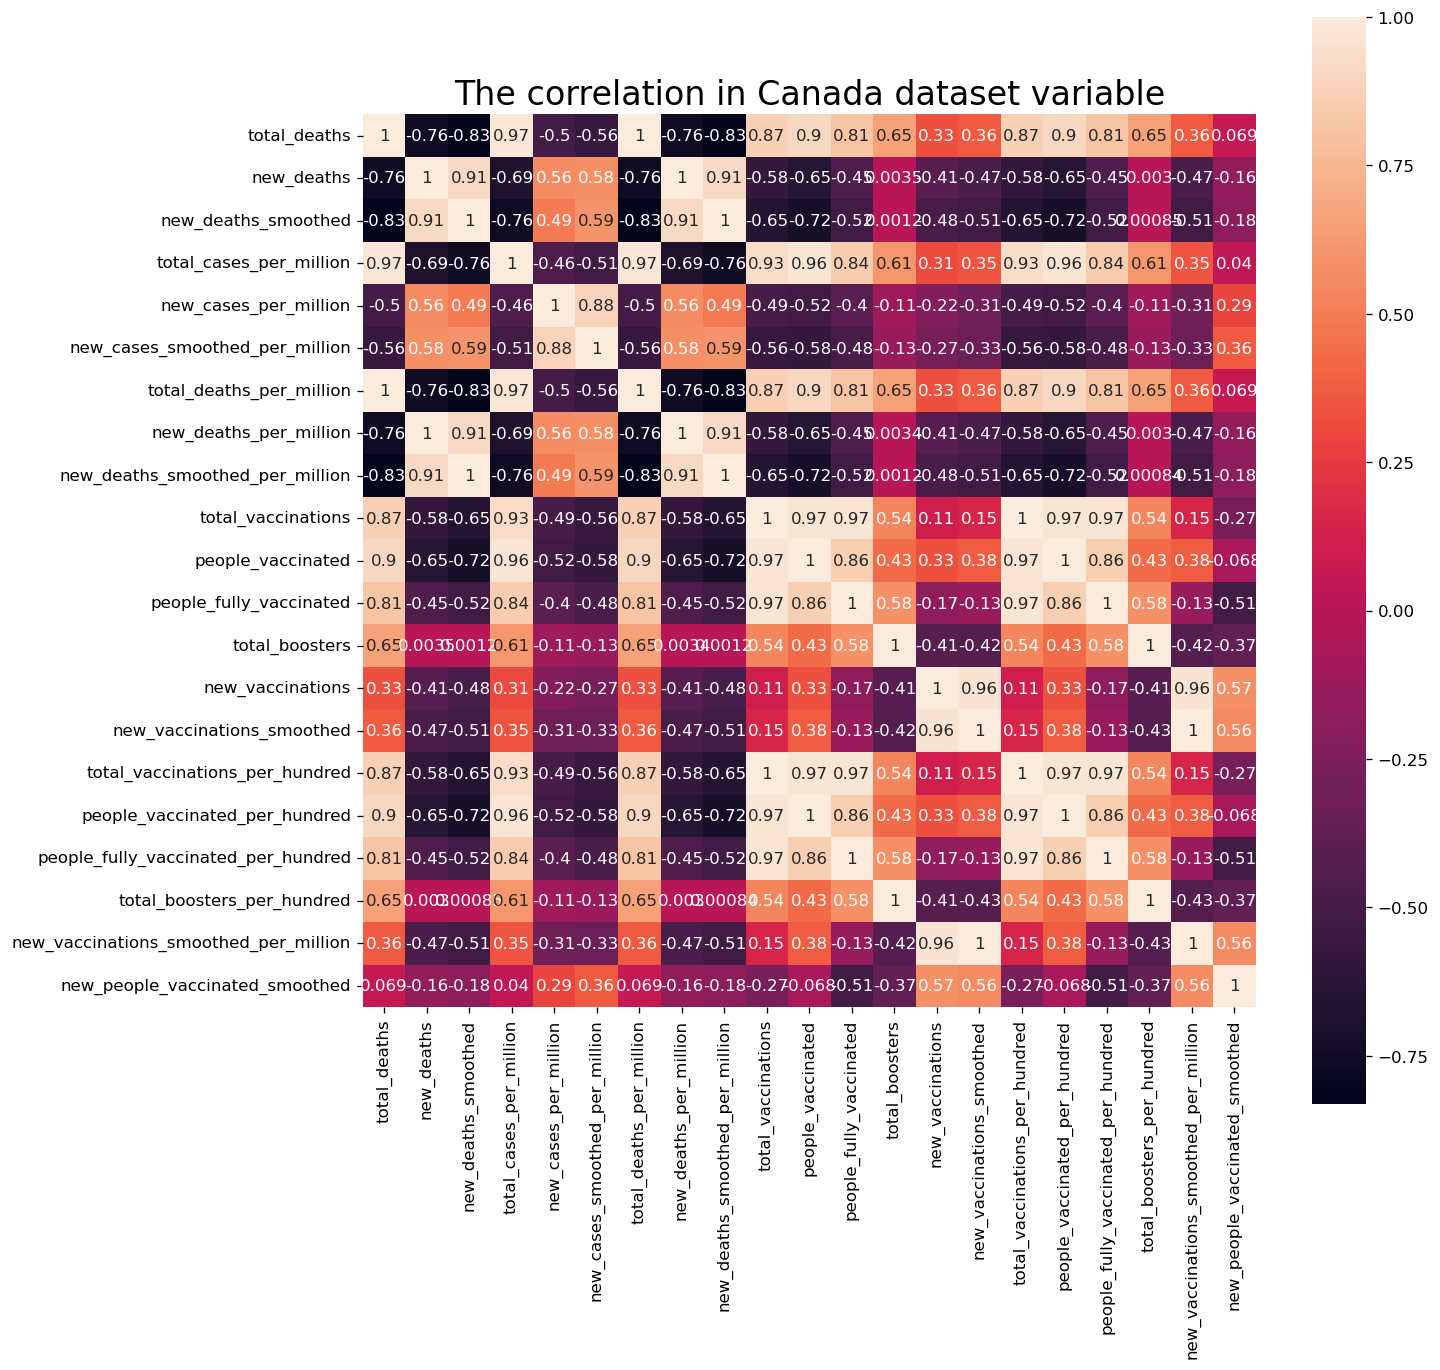

In [100]:
#correlation matrix in Canada
plt.subplots(figsize=(12, 12))
sns.heatmap(canada_temp.corr(), annot=True, square=True)
plt.title('The correlation in Canada dataset variable', fontsize=20)
plt.show()


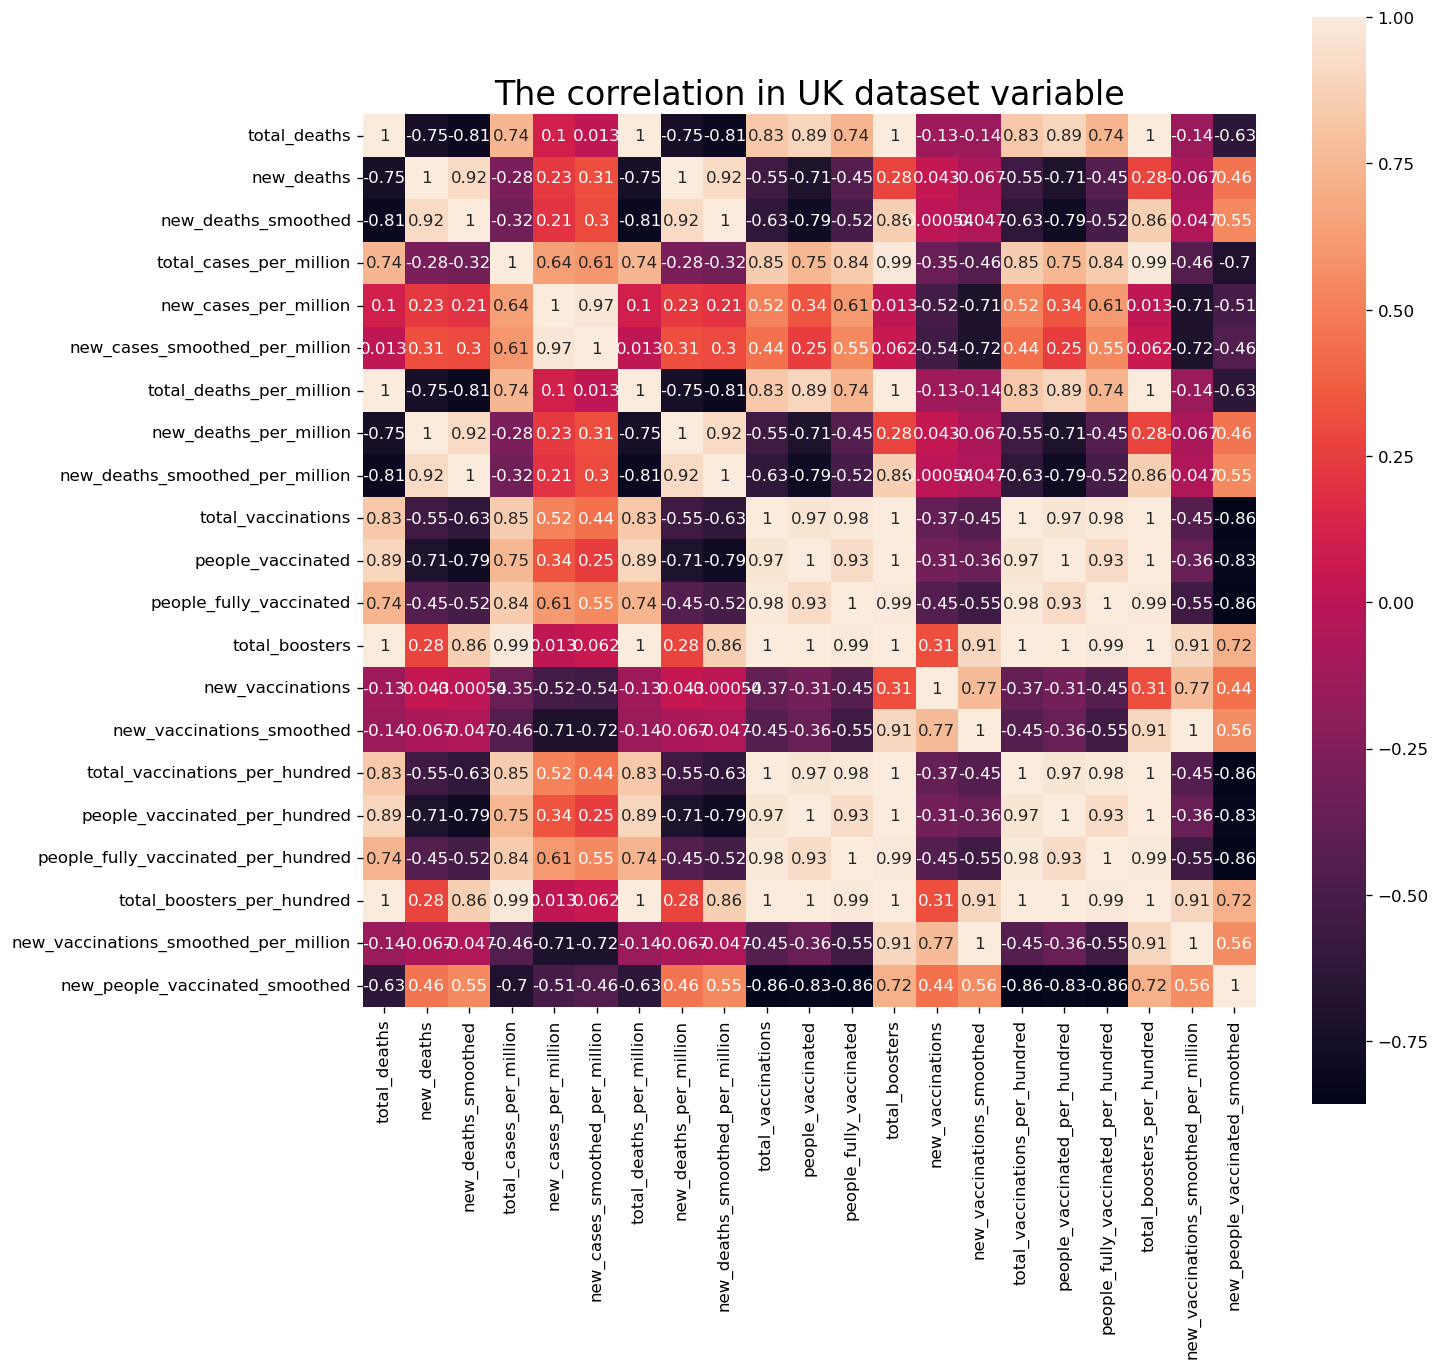

In [101]:
#correlation matrix in UK
plt.subplots(figsize=(12, 12))
sns.heatmap(uk_temp.corr(), annot=True, square=True)
plt.title('The correlation in UK dataset variable', fontsize=20)
plt.show()

In [102]:
# Total df for Canada and UK
canada_uk=new_df_part4[new_df_part4['location'].isin(['Canada','United Kingdom'])]
canada_uk

,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_vaccinations,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,location
21633,13677.0,140.0,111.571,12468.795,227.094,174.902,359.279,3.678,2.931,5.0,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,Canada
21634,13793.0,116.0,114.286,12634.052,165.257,174.996,362.326,3.047,3.002,727.0,...,NaN,722.0,722.0,0.00,0.00,NaN,NaN,19.0,722.0,Canada
21635,13911.0,118.0,114.571,12810.920,176.868,176.181,365.426,3.100,3.010,3016.0,...,NaN,2289.0,1506.0,0.01,0.01,NaN,NaN,40.0,1506.0,Canada
21636,14067.0,156.0,120.000,13007.070,196.149,179.420,369.524,4.098,3.152,7267.0,...,NaN,4251.0,2421.0,0.02,0.02,NaN,NaN,64.0,2421.0,Canada
21637,14180.0,113.0,117.857,13192.134,185.064,179.915,372.492,2.968,3.096,11276.0,...,NaN,4009.0,2818.0,0.03,0.03,NaN,NaN,74.0,2818.0,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126886,143337.0,63.0,157.286,140873.399,530.986,547.926,2101.496,0.924,2.306,109471164.0,...,12860751.0,257335.0,436173.0,160.50,74.16,67.48,18.86,6395.0,45681.0,United Kingdom
126887,143384.0,47.0,155.857,141469.598,596.199,565.393,2102.185,0.689,2.285,109807847.0,...,13147333.0,336683.0,436913.0,160.99,74.21,67.51,19.28,6406.0,45465.0,United Kingdom
126888,143598.0,214.0,148.857,142013.969,544.371,574.255,2105.323,3.138,2.182,110206709.0,...,13494890.0,398862.0,436561.0,161.58,74.25,67.54,19.79,6401.0,44264.0,United Kingdom
126889,143799.0,201.0,146.714,142574.820,560.851,571.229,2108.270,2.947,2.151,110646342.0,...,13879311.0,439633.0,399481.0,162.22,74.30,67.57,20.35,5857.0,31965.0,United Kingdom


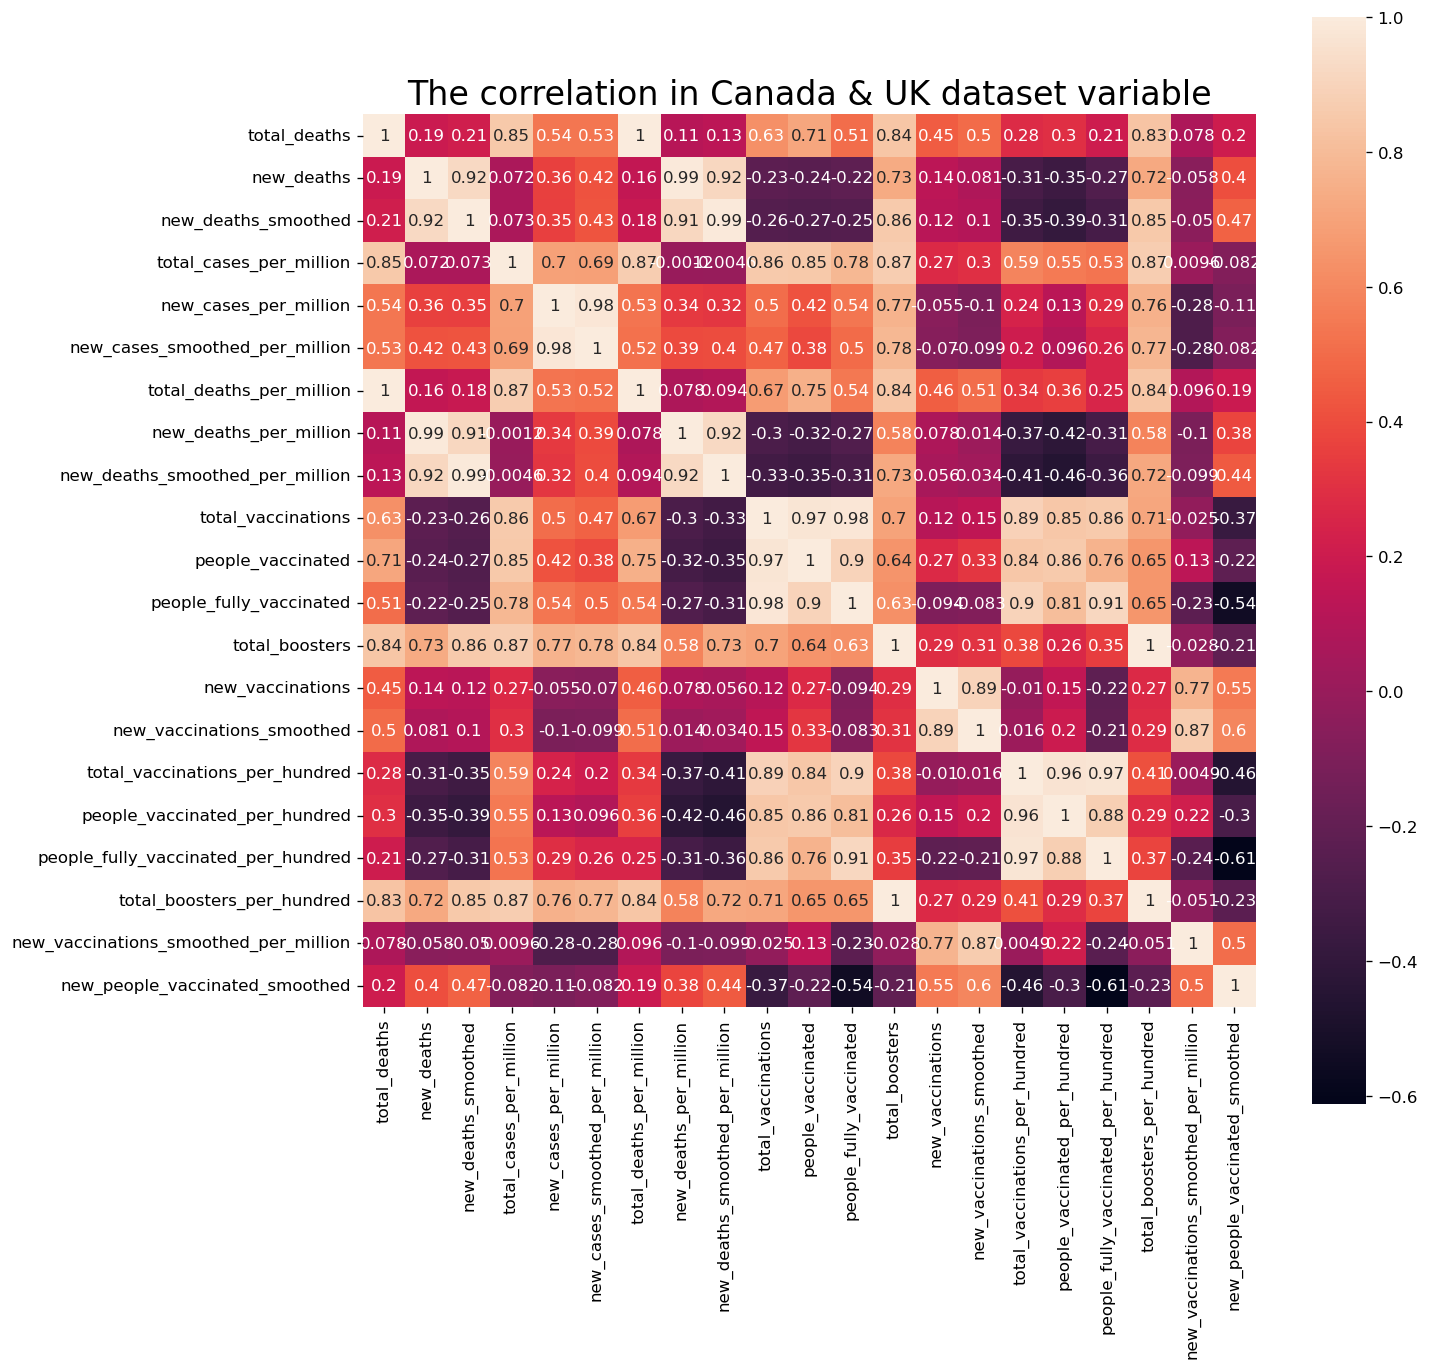

In [103]:
#correlation matrix
plt.subplots(figsize=(12, 12))
sns.heatmap(canada_uk.corr(), annot=True, square=True)
plt.title('The correlation in Canada & UK dataset variable', fontsize=20)
plt.show()

In [104]:
# extract the df for only vaccinated rate and new death for Canada
canada_vacc=canada_temp.loc[:,['people_vaccinated_per_hundred','new_deaths']]
canada_vacc

,people_vaccinated_per_hundred,new_deaths
21633,0.00,140.0
21634,0.00,116.0
21635,0.01,118.0
21636,0.02,156.0
21637,0.03,113.0
...,...,...
21969,78.99,50.0
21970,79.02,23.0
21971,79.08,27.0
21972,79.13,31.0


In [105]:
# extract the df for only vaccinated rate and new death for UK
uk_vacc=uk_temp.loc[:,['people_vaccinated_per_hundred','new_deaths']]
uk_vacc.head()

,people_vaccinated_per_hundred,new_deaths
126578,3.35,567.0
126579,3.57,529.0
126580,3.87,1246.0
126581,4.28,1568.0
126582,4.74,1253.0


Text(0, 0.5, 'Number of New Deaths in Canada')

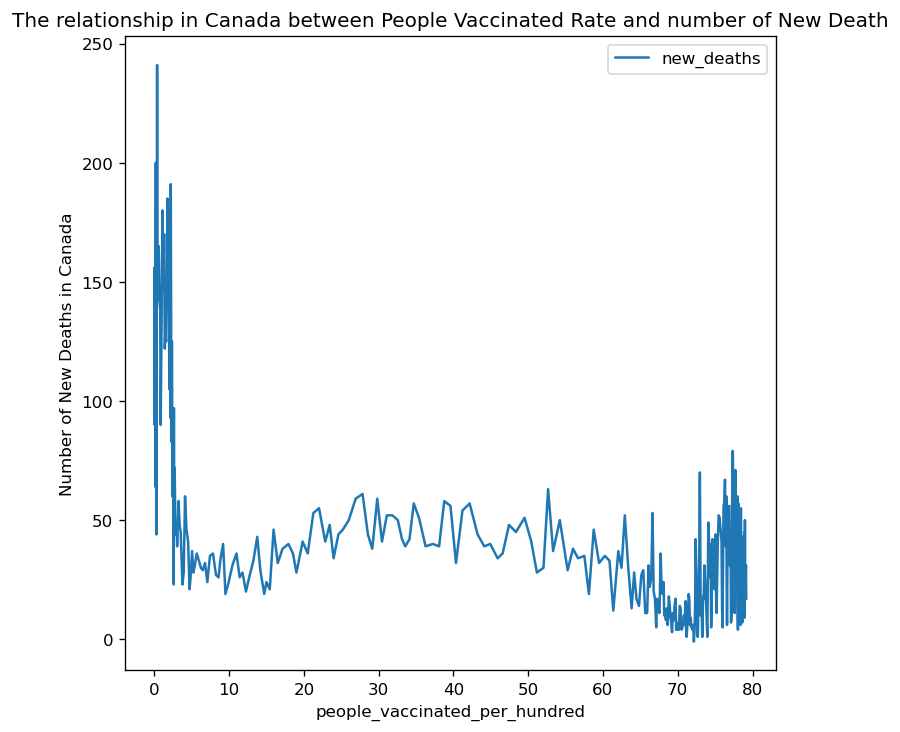

In [106]:
# Plot the line graph for the relationship between new death and people vaccinated rate in Canada
canada_vacc.plot(y = 'new_deaths', x = 'people_vaccinated_per_hundred') 
plt.title('The relationship in Canada between People Vaccinated Rate and number of New Death')
plt.ylabel('Number of New Deaths in Canada')

### <font color = 'Green'> - 1) Finding: 
    
Although there is a fluctuation in the number of the new death, as the people vaccinated rate per hundred increase, there is a overall decrease in the number of new death. The effect is most obvious at the beginning of the vaccination，when there is 5% people get vaccinated, there is a huge decrease in the number of new death in Canada.
    

Text(0, 0.5, 'Number of new_deaths in UK')

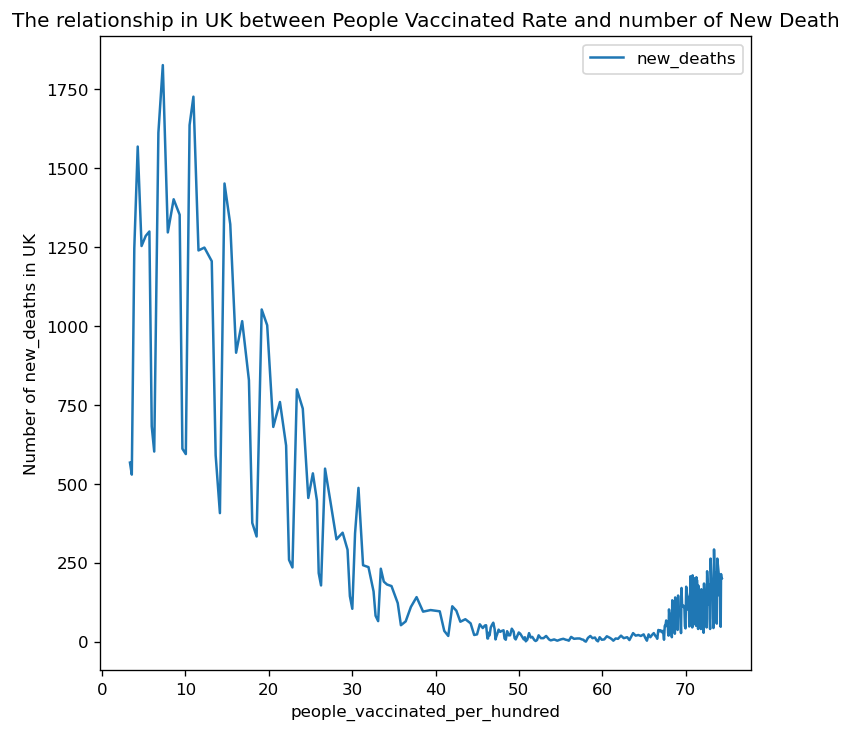

In [107]:
# Plot the line graph for the relationship between new death and people vaccinated rate in UK
uk_vacc.plot(y = 'new_deaths', x = 'people_vaccinated_per_hundred') 
plt.title('The relationship in UK between People Vaccinated Rate and number of New Death')
plt.ylabel('Number of new_deaths in UK')

### <font color = 'Green'> - 1) Finding: 
    
Although there is a fluctuation in the number of the new death, as the people vaccinated rate per hundred increase, there is a overall decrease in the number of new death. When the vaccinated rate around 50% to 65%, the number of new death is the lowest.

#### Find the relationship in linear regression - Canada

In [108]:
X = canada_vacc['people_vaccinated_per_hundred'].values.reshape(-1,1)
y = canada_vacc['new_deaths'].values.reshape(-1,1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [110]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [111]:
#Print intercept:
print(regressor.intercept_)

#Print slope:
print(regressor.coef_)

[87.65135468]
[[-0.91523748]]


This coefficient = -0.91 means that for every one unit of change in 'people_vaccinated_per_hundred' in  <font color = 'Red'>**Canada**</font>, there is a <font color = 'Blue'> <u>**opposite**</u></font> change in 'new_deaths' is about 0.91 (decrease 0.91) in Canada on average. Which means the facor "new deaths" has a negative association with variable "people vaccinated per hundred" in country Canada.

#### Find the relationship in linear regression - UK

In [112]:
X = uk_vacc['people_vaccinated_per_hundred'].values.reshape(-1,1)
y = uk_vacc['new_deaths'].values.reshape(-1,1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [114]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [115]:
#Print intercept:
print(regressor.intercept_)

#Print slope:
print(regressor.coef_)

[902.72181962]
[[-12.79707502]]


This coefficient = -12.79 means that for every one unit of change in 'people_vaccinated_per_hundred' in <font color = 'Red'>**UK**</font>, there is a <font color = 'Blue'> <u>**opposite**</u></font> change in 'new_deaths' is about 12.79 (decrease 12.79) in UK on average. Which means the facor "new deaths" has a negative association with variable "people vaccinated per hundred" in country UK.

#### Find the relationship in linear regression - all countries

In [116]:
#Check NA value
print('NA for people_vaccinated_per_hundred', new_df_part4['people_vaccinated_per_hundred'].isna().sum())
print('NA for new_deaths',new_df_part4['new_deaths'].isna().sum())

NA for people_vaccinated_per_hundred 0
NA for new_deaths 1764


In [117]:
# drop NA and create a new datafram as new_df_part4_na
new_df_part4_na = new_df_part4.drop(new_df_part4[new_df_part4.new_deaths.isna()].index)

In [118]:
X = new_df_part4_na['people_vaccinated_per_hundred'].values.reshape(-1,1)
y = new_df_part4_na['new_deaths'].values.reshape(-1,1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [120]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [121]:
#Print intercept:
print(regressor.intercept_)

#Print slope:
print(regressor.coef_)

[618.01495642]
[[-5.91479064]]


This coefficient = -5.914 means that for every one unit of change in 'people_vaccinated_per_hundred' in <font color ='Red'>**All Countries**</font>, there is a <font color = 'Blue'> <u>**opposite**</u></font> change in 'new_deaths' is about 5.914 (decrease 5.914) in all countries on average. Which means the facor "new deaths" has a negative association with variable "people vaccinated per hundred" in all countries.

# <font color = 'Blue'>5. Deriving insights about the effect of vaccination and discussion – [5 marks]

Using the findings from your models in Sections 3 and 4 on the coronavirus vaccination rates, you are now tasked with discussing the effect of vaccination on our daily lives. Which of your chosen countries has the most effective vaccination program? From what aspects? Why? What discoveries have you made as a result of the dataset and your models? Use evidence-based insights derived about the disease from your model(s) and your data analysis to justify your findings.

### <font color = 'Green'>Discussing the effect of vaccination on our daily lives?
    
- First according to the data shows, the number of the vaccination rate increase casue a decrease number of new death, moreover, we noticed that the pressure of the hostipal and ICU requirment also decrease a lot. In Canada, as the vaccination rate increase to 10%, there is already a huge decrease in the number of the new death, the reason may not abosultly becuase of the vaccinated, but it also becasue of the Canadian’s awareness of prevention and government control. In the UK, as the vaccination rate increase to 40%, there is a huge decrease in the number of the new death.

### <font color = 'Green'> Which of your chosen countries has the most effective vaccination program? From what aspects? Why? 
    

- I believe the <font color = 'Red'>**Canada**</font> has a more effective vaccination program, <font color = 'Red'>**from new death and people vaccination rate aspect**</font>. The <font color = 'Red'>**reason**</font> is because as we compare with the vaccination rate with UK and Canada, the best-case for these two countries is 78.528220% (UK) and 85.299564% (Canada). And when the vaccination rate are around 30%, as we can see the graph in Part 4, the UK new death is around 300, and the Canada new death only 50, only 1/6 of the UK! The Canadian government control and promote the importance of vaccination can get that lower number of new death. So the Canada has the most effective vaccination program.

### <font color = 'Green'>What discoveries have you made as a result of the dataset and your models?</font>

- Discoveries 1:

In Canada and the UK, as the vaccination rate near to the 70%, there is a <font color = 'Red'>**unusual change happend** </font>, the number of new death start increase <u>**(Canada increase number of new death from 20 to 70; UK increase number of new death from 100 to 250)**</u>


According to common sense, the higher the vaccination rate, the easier for people to stay away from the COVID and death, also according to the <u>**linear regression**</u> I made: for every one unit of change in 'people_vaccinated_per_hundred' in Canada, there is a opposite change in 'new_deaths' is about 0.91 (decrease 0.91) in Canada on average, for every one unit of change in 'people_vaccinated_per_hundred' in UK, there is a opposite change in 'new_deaths' is about 12.79 (decrease 12.79) in UK on average.


So the reverse increase of number of new death around 70% people vaccination rate is very unusual. As we all know the COVID is easy to produce mutant viruses, such as <u>**Delta varius**</u>, which is much strong, it is highly contagious, much more contagious as previous variants. People may not be enough to prevent this mutant virus from a single shot. So the UK and Canadian government should encourage people to get booster vaccines to prevent the spread of mutant viruses.

- Discoveries 2:

According to the number of new death, we found although the vaccination rate increase but the number of new death does not decrease a lot. I found we can not only rely on the vaccination, in order to abosultly control COVID19, we also need government cotrol and social distance.